In [1]:
import matplotlib.pyplot as plt
from scipy.linalg.cython_lapack import dpbsv

font_config = {
    'font.family': ['SimSun', 'Times New Roman'],  # 设置中英文字体
    'font.size': 10,  # 设置字体大小
    "mathtext.fontset": 'stix',  # 设置公式字体, 这是matplotlib自带的
    "font.serif": 'SimSun',  # 设置衬线字体
    "font.sans-serif": 'SimHei',  # 设置非衬线字体
    'axes.unicode_minus': False,  # 解决负号'-'显示为方块的问题
}

plt.rcParams.update(font_config)

In [5]:
import pandas as pd

file_path = r"C:\Users\zhangyutang\Desktop\电工杯B打包\电工杯\合并后的汇总表_更新.xlsx"

from pulp import LpMinimize, LpProblem, LpVariable, lpSum, LpInteger
data = pd.read_excel(file_path)
# 加载数据
df_new = pd.read_excel(file_path)
# 定义食物类别
food_types = {
    '大米饭': '谷、薯类', '馒头': '谷、薯类', '花卷': '谷、薯类', '豆浆': '奶、干豆、坚果、种子类及制品',
    '南瓜粥': '蔬菜、菌藻、水果类', '馄饨': '谷、薯类', '鸡排面': '畜、禽、鱼、蛋类及制品', '馄饨面': '谷、薯类',
    '红烧牛肉面': '畜、禽、鱼、蛋类及制品', '砂锅面': '谷、薯类', '包子': '谷、薯类', '馅饼': '谷、薯类',
    '鸡蛋饼': '畜、禽、鱼、蛋类及制品', '土豆丝饼': '谷、薯类', '水煎包': '谷、薯类', '水饺': '谷、薯类',
    '蒸饺': '谷、薯类', '韭菜盒子': '谷、薯类', '鸡蛋柿子汤': '畜、禽、鱼、蛋类及制品', '萝卜粉丝汤': '蔬菜、菌藻、水果类',
    '鱼丸汤': '畜、禽、鱼、蛋类及制品', '菠菜汤': '蔬菜、菌藻、水果类', '拌豆腐': '奶、干豆、坚果、种子类及制品',
    '拌干豆腐': '奶、干豆、坚果、种子类及制品', '拌木耳': '蔬菜、菌藻、水果类', '拌芹菜花生米': '奶、干豆、坚果、种子类及制品',
    '海带炖白菜': '蔬菜、菌藻、水果类', '白菜炖豆腐': '奶、干豆、坚果、种子类及制品', '鸡肉炖土豆胡萝卜': '畜、禽、鱼、蛋类及制品',
    '明太鱼炖豆腐': '畜、禽、鱼、蛋类及制品', '炒芹菜粉': '蔬菜、菌藻、水果类', '香菇炒油菜': '蔬菜、菌藻、水果类',
    '卷心菜炒木耳': '蔬菜、菌藻、水果类', '炒三丝': '蔬菜、菌藻、水果类', '炒豆芽粉条': '蔬菜、菌藻、水果类',
    '木须柿子': '蔬菜、菌藻、水果类', '木须瓜片': '蔬菜、菌藻、水果类', '地三鲜': '蔬菜、菌藻、水果类',
    '炒肉扁豆': '畜、禽、鱼、蛋类及制品', '炒肉蒜台': '畜、禽、鱼、蛋类及制品', '炒肉青椒': '畜、禽、鱼、蛋类及制品',
    '炒肉杏鲍菇': '畜、禽、鱼、蛋类及制品', '炒肉酸菜粉': '畜、禽、鱼、蛋类及制品', '家常豆腐': '奶、干豆、坚果、种子类及制品',
    '溜肉段': '畜、禽、鱼、蛋类及制品', '锅包肉': '畜、禽、鱼、蛋类及制品', '红烧肉': '畜、禽、鱼、蛋类及制品',
    '烧排骨': '畜、禽、鱼、蛋类及制品', '宫保鸡丁': '畜、禽、鱼、蛋类及制品', '炸鸡块': '畜、禽、鱼、蛋类及制品',
    '炒牛肉': '畜、禽、鱼、蛋类及制品', '茄汁沙丁鱼': '畜、禽、鱼、蛋类及制品', '干炸黄花鱼': '畜、禽、鱼、蛋类及制品',
    '红烧带鱼': '畜、禽、鱼、蛋类及制品', '西瓜': '蔬菜、菌藻、水果类', '香蕉': '蔬菜、菌藻、水果类',
    '蜜瓜': '蔬菜、菌藻、水果类', '苹果': '蔬菜、菌藻、水果类', '葡萄': '蔬菜、菌藻、水果类', '牛奶': '奶、干豆、坚果、种子类及制品',
    '酸奶': '奶、干豆、坚果、种子类及制品', '大米粥': '谷、薯类', '小米粥': '谷、薯类', '油条': '谷、薯类',
    '煮鸡蛋': '畜、禽、鱼、蛋类及制品', '煎鸡蛋': '畜、禽、鱼、蛋类及制品', '蒸地瓜': '谷、薯类', '拌菠菜': '蔬菜、菌藻、水果类',
    '拌海带丝': '蔬菜、菌藻、水果类', '拌土豆丝': '蔬菜、菌藻、水果类', '橙子': '蔬菜、菌藻、水果类', '炖海带白菜豆腐': '蔬菜、菌藻、水果类',
    '柚子': '蔬菜、菌藻、水果类'
}

df_new['类别'] = df_new['食物名称'].map(food_types)

# 提取相关数据列用于优化
cost = df_new['价格（元/份）'].to_list()
prices = df_new['价格（元/份）'].to_list()
calories = df_new['实际摄入能量kcal'].to_list()
protein = df_new['实际摄入蛋白质g'].to_list()
fat = df_new['实际摄入脂肪g'].to_list()
carbs = df_new['实际摄入碳水化合物g'].to_list()
calcium = df_new['实际摄入钙（mg）'].to_list()
iron = df_new['实际摄入铁（mg）'].to_list()
zinc = df_new['实际摄入锌（mg）'].to_list()
vitamin_a = df_new['实际摄入维生素A（μg）'].to_list()
vitamin_b1 = df_new['实际摄入维生素B1/硫胺素（mg）'].to_list()
vitamin_b2 = df_new['实际摄入维生素B2/核黄素（mg）'].to_list()
vitamin_c = df_new['实际摄入维生素C（mg）'].to_list()

# 选择25种最便宜的食物
selected_foods = df_new.sort_values('价格（元/份）')['食物名称'].unique()[:25]

# 将25种食物均匀分配到一周
distributed_foods = []
for i, food in enumerate(selected_foods):
    day = i % 7
    distributed_foods.append((day, food))

def optimize_daily_diet(day, distributed_foods):
    # 创建优化问题
    model = LpProblem(name=f"diet-problem-day-{day+1}", sense=LpMinimize)

    # 定义决策变量
    x = [LpVariable(f"x{i}", cat=LpInteger, lowBound=0) for i in range(len(prices))]

    # 添加目标函数
    model += lpSum(prices[i] * x[i] for i in range(len(prices))), "Total Cost"

    # 添加约束条件
    model += lpSum([x[i] for i in range(len(prices))]) >= 12, f"Min_Food_Types_Day_{day}"

    categories = df_new['类别'].unique()
    for category in categories:
        model += lpSum([x[i] for i in range(len(prices)) if df_new['类别'][i] == category]) >= 1, f"Category_{category}_Constraint_Day_{day}"
# 男生
    model += lpSum(calories[i] * x[i] for i in range(len(prices))) >= 0.9 * 2400, f"Min_Calories_Day_{day}"
    model += lpSum(calories[i] * x[i] for i in range(len(prices))) <= 1.1 * 2400, f"Max_Calories_Day_{day}"

    model += lpSum(calcium[i] * x[i] for i in range(len(cost))) >= 700, "Min Calcium"
    model += lpSum(calcium[i] * x[i] for i in range(len(cost))) <= 900, "Max Calcium"
    model += lpSum(iron[i] * x[i] for i in range(len(cost))) >= 11, "Min Iron"
    model += lpSum(iron[i] * x[i] for i in range(len(cost))) <= 13, "Max Iron"
    model += lpSum(zinc[i] * x[i] for i in range(len(cost))) >= 10, "Min Zinc"
    model += lpSum(zinc[i] * x[i] for i in range(len(cost))) <= 14, "Max Zinc"
    model += lpSum(vitamin_a[i] * x[i] for i in range(len(cost))) >= 700, "Min Vitamin A"
    model += lpSum(vitamin_a[i] * x[i] for i in range(len(cost))) <= 900, "Max Vitamin A"
    model += lpSum(vitamin_b1[i] * x[i] for i in range(len(cost))) >= 1.2, "Min Vitamin B1"
    model += lpSum(vitamin_b1[i] * x[i] for i in range(len(cost))) <= 1.6, "Max Vitamin B1"
    model += lpSum(vitamin_b2[i] * x[i] for i in range(len(cost))) >= 1.2, "Min Vitamin B2"
    model += lpSum(vitamin_b2[i] * x[i] for i in range(len(cost))) <= 1.6, "Max Vitamin B2"
    model += lpSum(vitamin_c[i] * x[i] for i in range(len(cost))) >= 90, "Min Vitamin C"
    model += lpSum(vitamin_c[i] * x[i] for i in range(len(cost))) <= 110, "Max Vitamin C"
    total_energy = [4 * protein[i] + 9 * fat[i] + 4 * carbs[i] for i in range(len(prices))]
    model += lpSum(4 * protein[i] * x[i] for i in range(len(prices))) >= 0.10 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Min_Protein_Day_{day}"
    model += lpSum(4 * protein[i] * x[i] for i in range(len(prices))) <= 0.15 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Max_Protein_Day_{day}"
    model += lpSum(9 * fat[i] * x[i] for i in range(len(prices))) >= 0.20 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Min_Fat_Day_{day}"
    model += lpSum(9 * fat[i] * x[i] for i in range(len(prices))) <= 0.30 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Max_Fat_Day_{day}"
    model += lpSum(4 * carbs[i] * x[i] for i in range(len(prices))) >= 0.50 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Min_Carbs_Day_{day}"
    model += lpSum(4 * carbs[i] * x[i] for i in range(len(prices))) <= 0.65 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Max_Carbs_Day_{day}"

    current_day_foods = [f for f in distributed_foods if f[0] == day]
    for idx, food in enumerate(current_day_foods):
        food_index = df_new[df_new['食物名称'] == food[1]].index[0]
        model += x[food_index] >= 1, f"Include_{food[1]}_Day_{day}_Constraint_{idx}"

    model.solve()

    selected_foods = []
    selected_quantities = []
    selected_meals = []
    selected_prices = []

    for i in range(len(prices)):
        if x[i].varValue > 0:
            selected_foods.append(df_new['食物名称'][i])
            selected_quantities.append(int(x[i].varValue))
            selected_meals.append(df_new['餐次'][i])
            selected_prices.append(df_new['价格（元/份）'][i])
            print(f"第 {day+1} 天 - 食品 {df_new['食物名称'][i]}: {int(x[i].varValue)} 份，餐次：{df_new['餐次'][i]}，单价：{df_new['价格（元/份）'][i]} 元")

    return selected_foods, selected_quantities, selected_meals, selected_prices

selected_foods_total = []
selected_quantities_total = []
selected_meals_total = []
selected_prices_total = []
selected_days_total = []

for day in range(7):
    selected_foods, selected_quantities, selected_meals, selected_prices = optimize_daily_diet(day, distributed_foods)
    selected_foods_total.extend(selected_foods)
    selected_quantities_total.extend(selected_quantities)
    selected_meals_total.extend(selected_meals)
    selected_prices_total.extend(selected_prices)
    selected_days_total.extend([day + 1] * len(selected_foods))

# 检查一周内总食物种类数量是否大于25
unique_foods_total = list(set(selected_foods_total))
if len(unique_foods_total) < 25:
    # 获取缺少的食物种类数量
    num_additional_foods = 25 - len(unique_foods_total)
    # 获取最便宜的食物种类，并确保它们不在现有的食物种类中
    additional_foods = [food for food in df_new.sort_values('价格（元/份）')['食物名称'].unique() if food not in unique_foods_total][:num_additional_foods]
    
    # 将这些额外食物均匀分配到一周的不同天数和餐次
    for i, food in enumerate(additional_foods):
        day = i % 7
        meal = ['早餐', '午餐', '晚餐'][i % 3]
        selected_foods_total.append(food)
        selected_quantities_total.append(1)
        selected_meals_total.append(meal)
        selected_prices_total.append(df_new[df_new['食物名称'] == food]['价格（元/份）'].values[0])
        selected_days_total.append(day + 1)
        print(f"额外添加 - 第 {day+1} 天 - 食品 {food}: 1 份，餐次：{meal}，单价：{df_new[df_new['食物名称'] == food]['价格（元/份）'].values[0]} 元")

# 生成结果表格
result_df = pd.DataFrame({
    '天数': selected_days_total,
    '餐次': selected_meals_total,
    '食物名称': selected_foods_total,
    '数量（份）': selected_quantities_total,
    '单价（元）': selected_prices_total
})
# 打印最终结果
print("总成本：", sum(selected_prices_total))
# 保存结果到Excel文件
result_df.to_excel('优化结果_每周_男_最经济.xlsx', index=False)

# 显示结果表格
print(result_df)


第 1 天 - 食品 拌豆腐: 1 份，餐次：午餐，单价：4.0 元
第 1 天 - 食品 蜜瓜: 27 份，餐次：午餐，单价：1.0 元
第 1 天 - 食品 酸奶: 8 份，餐次：早餐，单价：1.5 元
第 1 天 - 食品 大米饭: 12 份，餐次：早餐，单价：0.5 元
第 1 天 - 食品 砂锅面: 40 份，餐次：晚餐，单价：30.0 元
第 1 天 - 食品 红烧肉: 9 份，餐次：晚餐，单价：24.0 元
第 1 天 - 食品 柚子: 1 份，餐次：晚餐，单价：1.0 元
第 2 天 - 食品 豆浆: 1 份，餐次：午餐，单价：1.5 元
第 2 天 - 食品 南瓜粥: 1 份，餐次：午餐，单价：1.0 元
第 2 天 - 食品 拌木耳: 1 份，餐次：午餐，单价：4.0 元
第 2 天 - 食品 蜜瓜: 2 份，餐次：午餐，单价：1.0 元
第 2 天 - 食品 酸奶: 3 份，餐次：早餐，单价：1.5 元
第 2 天 - 食品 大米粥: 1 份，餐次：早餐，单价：0.5 元
第 2 天 - 食品 蒸地瓜: 8 份，餐次：早餐，单价：1.0 元
第 2 天 - 食品 大米饭: 3 份，餐次：晚餐，单价：0.5 元
第 2 天 - 食品 砂锅面: 1 份，餐次：晚餐，单价：30.0 元
第 2 天 - 食品 溜肉段: 2 份，餐次：晚餐，单价：32.0 元
第 2 天 - 食品 红烧肉: 1 份，餐次：晚餐，单价：24.0 元
第 2 天 - 食品 茄汁沙丁鱼: 1 份，餐次：晚餐，单价：7.0 元
第 2 天 - 食品 香蕉: 1 份，餐次：晚餐，单价：1.0 元
第 2 天 - 食品 柚子: 1 份，餐次：晚餐，单价：1.0 元
第 3 天 - 食品 花卷: 1 份，餐次：午餐，单价：1.0 元
第 3 天 - 食品 红烧肉: 1 份，餐次：午餐，单价：24.0 元
第 3 天 - 食品 蜜瓜: 1 份，餐次：午餐，单价：1.0 元
第 3 天 - 食品 牛奶: 2 份，餐次：早餐，单价：1.5 元
第 3 天 - 食品 酸奶: 1 份，餐次：早餐，单价：1.5 元
第 3 天 - 食品 小米粥: 1 份，餐次：早餐，单价：0.5 元
第 3 天 - 食品 煮鸡蛋: 3 份，餐次：早餐，单价：1.0 元
第 3 天 - 食品 拌菠菜: 1 份，餐

午餐 的蛋白质氨基酸评分: 22.64
早餐 的蛋白质氨基酸评分: 72.84
晚餐 的蛋白质氨基酸评分: 59.84
总能量: 31795.28 kcal
总蛋白质: 1115.63 g
总脂肪: 585.92 g
总碳水化合物: 5413.71 g
总钙: 9682.0 mg
总铁: 385.18 mg
总锌: 163.88 mg
总维生素A: 5524.6 μg
总维生素B1: 21.29 mg
总维生素B2: 14.26 mg
总维生素C: 1031.2 mg
能量与目标值相差: 1224.80%
Calcium 达成率: 1210.25%
Iron 达成率: 2567.87%
Zinc 达成率: 1365.67%
Vitamin_a 达成率: 690.58%
Vitamin_b1 达成率: 1520.71%
Vitamin_b2 达成率: 1018.57%
Vitamin_c 达成率: 1031.20%
蛋白质供能比例: 14.04%
脂肪供能比例: 16.59%
碳水化合物供能比例: 68.11%


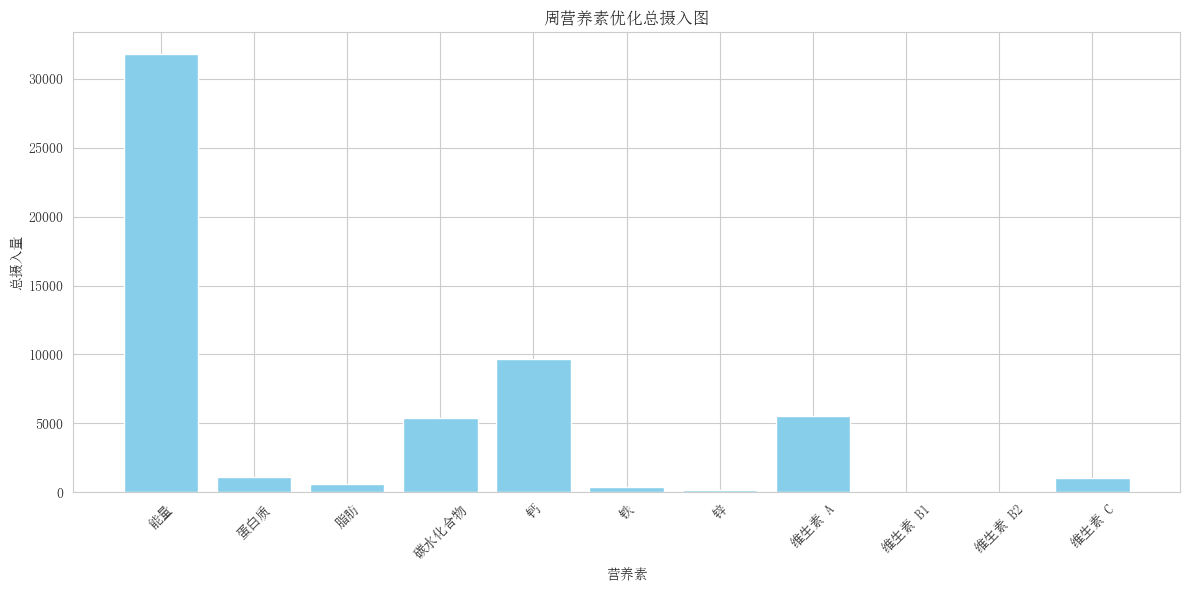

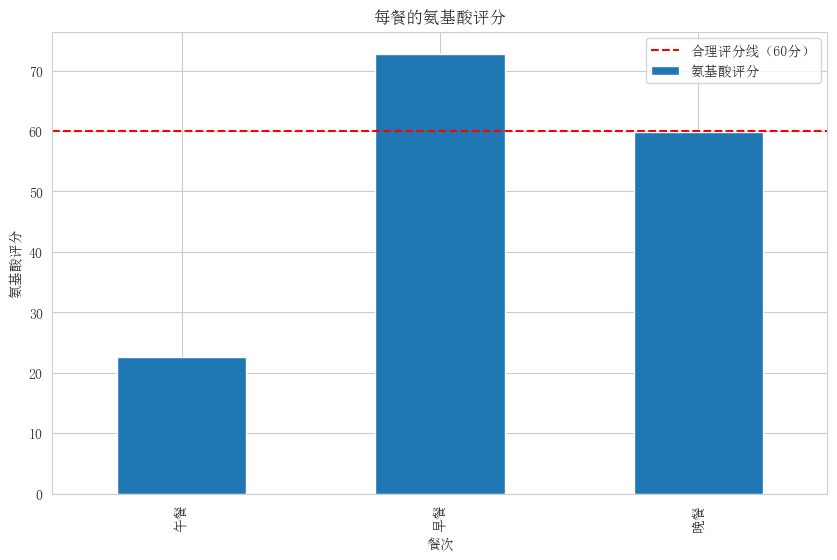

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
# 设置matplotlib绘图时可以显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 使得坐标轴负号显示正常

# 膳食营养评价函数，保留两位小数
def evaluate_nutrition_weekly(selected_foods, selected_quantities, data):
    # 计算总营养成分
    total_calories = round(sum(data.loc[data['食物名称'] == food, '实际摄入能量kcal'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_protein = round(sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_fat = round(sum(data.loc[data['食物名称'] == food, '实际摄入脂肪g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_carbs = round(sum(data.loc[data['食物名称'] == food, '实际摄入碳水化合物g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_calcium = round(sum(data.loc[data['食物名称'] == food, '实际摄入钙（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_iron = round(sum(data.loc[data['食物名称'] == food, '实际摄入铁（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_zinc = round(sum(data.loc[data['食物名称'] == food, '实际摄入锌（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_a = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素A（μg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b1 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B1/硫胺素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b2 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B2/核黄素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_c = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素C（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    
    # 显示总营养成分
    print(f"总能量: {total_calories} kcal")
    print(f"总蛋白质: {total_protein} g")
    print(f"总脂肪: {total_fat} g")
    print(f"总碳水化合物: {total_carbs} g")
    print(f"总钙: {total_calcium} mg")
    print(f"总铁: {total_iron} mg")
    print(f"总锌: {total_zinc} mg")
    print(f"总维生素A: {total_vitamin_a} μg")
    print(f"总维生素B1: {total_vitamin_b1} mg")
    print(f"总维生素B2: {total_vitamin_b2} mg")
    print(f"总维生素C: {total_vitamin_c} mg")

    # 可视化
    labels = ['能量', '蛋白质', '脂肪', '碳水化合物', '钙', '铁', '锌', '维生素 A', '维生素 B1', '维生素 B2', '维生素 C']
    values = [total_calories, total_protein, total_fat, total_carbs, total_calcium, total_iron, total_zinc, total_vitamin_a, total_vitamin_b1, total_vitamin_b2, total_vitamin_c]

    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('营养素')
    plt.ylabel('总摄入量')
    plt.title('周营养素优化总摄入图')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('nutritional_evaluation_weekly.png',dpi=500)

    return {
        'total_calories': total_calories,
        'total_protein': total_protein,
        'total_fat': total_fat,
        'total_carbs': total_carbs,
        'total_calcium': total_calcium,
        'total_iron': total_iron,
        'total_zinc': total_zinc,
        'total_vitamin_a': total_vitamin_a,
        'total_vitamin_b1': total_vitamin_b1,
        'total_vitamin_b2': total_vitamin_b2,
        'total_vitamin_c': total_vitamin_c
    }

# 评价能量、餐次比及非产能主要营养素含量
def evaluate_energy_and_nutrients(nutrition_results, target_calories=2400):
    energy_diff = (nutrition_results['total_calories'] - target_calories) / target_calories * 100
    print(f"能量与目标值相差: {energy_diff:.2f}%")
    
    # 定义参考摄入量
    reference_intake = {
        'calcium': 800,  # mg
        'iron': 15,      # mg
        'zinc': 12,      # mg
        'vitamin_a': 800,  # μg
        'vitamin_b1': 1.4, # mg
        'vitamin_b2': 1.4, # mg
        'vitamin_c': 100   # mg
    }
    
    # 计算营养素达成率
    intake_ratio = {nutrient: (nutrition_results[f'total_{nutrient}'] / ref) * 100 for nutrient, ref in reference_intake.items()}
    
    # 打印营养素达成率
    for nutrient, ratio in intake_ratio.items():
        print(f"{nutrient.capitalize()} 达成率: {ratio:.2f}%")
    
    return intake_ratio

# 评价能量来源
def evaluate_energy_sources(nutrition_results):
    total_energy = nutrition_results['total_calories']
    protein_energy = 4 * nutrition_results['total_protein']
    fat_energy = 9 * nutrition_results['total_fat']
    carb_energy = 4 * nutrition_results['total_carbs']
    
    protein_pct = protein_energy / total_energy * 100
    fat_pct = fat_energy / total_energy * 100
    carb_pct = carb_energy / total_energy * 100
    
    print(f"蛋白质供能比例: {protein_pct:.2f}%")
    print(f"脂肪供能比例: {fat_pct:.2f}%")
    print(f"碳水化合物供能比例: {carb_pct:.2f}%")
    
    # 参考值
    ref_protein_pct = (10, 15)
    ref_fat_pct = (20, 30)
    ref_carb_pct = (50, 65)
    
    return {
        'protein_pct': protein_pct,
        'fat_pct': fat_pct,
        'carb_pct': carb_pct
    }

# 参考蛋白质氨基酸评分模式
reference_aa = {
    '异亮氨酸（mg）': 40,
    '亮氨酸（mg）': 70,
    '赖氨酸（mg）': 55,
    '含硫氨基酸（mg）': 35,
    '芳香族氨基酸（mg）': 60,
    '苏氨酸（mg）': 40,
    '色氨酸（mg）': 10,
    '缬氨酸（mg）': 50
}

# 评价每餐的蛋白质氨基酸评分
def evaluate_amino_acid_scores_weekly(selected_foods, selected_quantities, selected_meals, data):
    amino_acid_scores = {}
    
    meals = data['餐次'].unique()
    for meal in meals:
        meal_foods = [food for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]
        meal_quantities = [qty for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]
        
        total_lysine = sum(data.loc[data['食物名称'] == food, '实际摄入赖氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_leucine = sum(data.loc[data['食物名称'] == food, '实际摄入亮氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_isoleucine = sum(data.loc[data['食物名称'] == food, '实际摄入异亮氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_sulfur = sum(data.loc[data['食物名称'] == food, '实际摄入含硫氨基酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_aromatic = sum(data.loc[data['食物名称'] == food, '实际摄入芳香族氨基酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_threonine = sum(data.loc[data['食物名称'] == food, '实际摄入苏氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_tryptophan = sum(data.loc[data['食物名称'] == food, '实际摄入色氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_valine = sum(data.loc[data['食物名称'] == food, '实际摄入缬氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        
        # 计算每餐蛋白质总量
        total_protein = sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        
        # 将氨基酸含量从mg/100g食物转换为mg/g蛋白质
        total_lysine /= total_protein
        total_leucine /= total_protein
        total_isoleucine /= total_protein
        total_sulfur /= total_protein
        total_aromatic /= total_protein
        total_threonine /= total_protein
        total_tryptophan /= total_protein
        total_valine /= total_protein
        
        # 计算每餐氨基酸评分
        lysine_score = total_lysine / reference_aa['赖氨酸（mg）'] * 100
        leucine_score = total_leucine / reference_aa['亮氨酸（mg）'] * 100
        isoleucine_score = total_isoleucine / reference_aa['异亮氨酸（mg）'] * 100
        sulfur_score = total_sulfur / reference_aa['含硫氨基酸（mg）'] * 100
        aromatic_score = total_aromatic / reference_aa['芳香族氨基酸（mg）'] * 100
        threonine_score = total_threonine / reference_aa['苏氨酸（mg）'] * 100
        tryptophan_score = total_tryptophan / reference_aa['色氨酸（mg）'] * 100
        valine_score = total_valine / reference_aa['缬氨酸（mg）'] * 100
        
        # 计算综合氨基酸评分（取最低值）
        amino_acid_score = min(lysine_score, leucine_score, isoleucine_score, sulfur_score, aromatic_score, threonine_score, tryptophan_score, valine_score)
        
        amino_acid_scores[meal] = round(amino_acid_score, 2)
        print(f"{meal} 的蛋白质氨基酸评分: {amino_acid_scores[meal]}")
    
    return amino_acid_scores

# 调用函数进行每餐蛋白质氨基酸评分评价
amino_acid_scores_weekly = evaluate_amino_acid_scores_weekly(selected_foods, selected_quantities, selected_meals, data)

# 计算并显示每周食谱的综合评价结果
nutrition_results_weekly = evaluate_nutrition_weekly(selected_foods_total, selected_quantities_total, df_new)

# 调用函数进行能量和营养素评价
intake_ratios_weekly = evaluate_energy_and_nutrients(nutrition_results_weekly)

# 调用函数进行能量来源评价
energy_sources_weekly = evaluate_energy_sources(nutrition_results_weekly)

# 可视化每餐的氨基酸评分
def plot_amino_acid_scores(amino_acid_scores):
    aa_scores_df = pd.DataFrame(amino_acid_scores, index=["氨基酸评分"]).T

    aa_scores_df.plot(kind='bar', figsize=(10, 6))
    plt.title('每餐的氨基酸评分')
    plt.ylabel('氨基酸评分')
    plt.xlabel('餐次')
    plt.axhline(y=60, color='r', linestyle='--', label='合理评分线（60分）')
    plt.legend()
    plt.savefig('amino_acid_scores_weekly.png',dpi=500)

# 调用函数进行氨基酸评分的可视化
plot_amino_acid_scores(amino_acid_scores_weekly)


In [11]:
import pandas as pd
from pulp import LpMinimize, LpProblem, LpVariable, lpSum, LpInteger

# 加载数据
df_new = pd.read_excel(file_path)
# 定义食物类别
food_types = {
    '大米饭': '谷、薯类', '馒头': '谷、薯类', '花卷': '谷、薯类', '豆浆': '奶、干豆、坚果、种子类及制品',
    '南瓜粥': '蔬菜、菌藻、水果类', '馄饨': '谷、薯类', '鸡排面': '畜、禽、鱼、蛋类及制品', '馄饨面': '谷、薯类',
    '红烧牛肉面': '畜、禽、鱼、蛋类及制品', '砂锅面': '谷、薯类', '包子': '谷、薯类', '馅饼': '谷、薯类',
    '鸡蛋饼': '畜、禽、鱼、蛋类及制品', '土豆丝饼': '谷、薯类', '水煎包': '谷、薯类', '水饺': '谷、薯类',
    '蒸饺': '谷、薯类', '韭菜盒子': '谷、薯类', '鸡蛋柿子汤': '畜、禽、鱼、蛋类及制品', '萝卜粉丝汤': '蔬菜、菌藻、水果类',
    '鱼丸汤': '畜、禽、鱼、蛋类及制品', '菠菜汤': '蔬菜、菌藻、水果类', '拌豆腐': '奶、干豆、坚果、种子类及制品',
    '拌干豆腐': '奶、干豆、坚果、种子类及制品', '拌木耳': '蔬菜、菌藻、水果类', '拌芹菜花生米': '奶、干豆、坚果、种子类及制品',
    '海带炖白菜': '蔬菜、菌藻、水果类', '白菜炖豆腐': '奶、干豆、坚果、种子类及制品', '鸡肉炖土豆胡萝卜': '畜、禽、鱼、蛋类及制品',
    '明太鱼炖豆腐': '畜、禽、鱼、蛋类及制品', '炒芹菜粉': '蔬菜、菌藻、水果类', '香菇炒油菜': '蔬菜、菌藻、水果类',
    '卷心菜炒木耳': '蔬菜、菌藻、水果类', '炒三丝': '蔬菜、菌藻、水果类', '炒豆芽粉条': '蔬菜、菌藻、水果类',
    '木须柿子': '蔬菜、菌藻、水果类', '木须瓜片': '蔬菜、菌藻、水果类', '地三鲜': '蔬菜、菌藻、水果类',
    '炒肉扁豆': '畜、禽、鱼、蛋类及制品', '炒肉蒜台': '畜、禽、鱼、蛋类及制品', '炒肉青椒': '畜、禽、鱼、蛋类及制品',
    '炒肉杏鲍菇': '畜、禽、鱼、蛋类及制品', '炒肉酸菜粉': '畜、禽、鱼、蛋类及制品', '家常豆腐': '奶、干豆、坚果、种子类及制品',
    '溜肉段': '畜、禽、鱼、蛋类及制品', '锅包肉': '畜、禽、鱼、蛋类及制品', '红烧肉': '畜、禽、鱼、蛋类及制品',
    '烧排骨': '畜、禽、鱼、蛋类及制品', '宫保鸡丁': '畜、禽、鱼、蛋类及制品', '炸鸡块': '畜、禽、鱼、蛋类及制品',
    '炒牛肉': '畜、禽、鱼、蛋类及制品', '茄汁沙丁鱼': '畜、禽、鱼、蛋类及制品', '干炸黄花鱼': '畜、禽、鱼、蛋类及制品',
    '红烧带鱼': '畜、禽、鱼、蛋类及制品', '西瓜': '蔬菜、菌藻、水果类', '香蕉': '蔬菜、菌藻、水果类',
    '蜜瓜': '蔬菜、菌藻、水果类', '苹果': '蔬菜、菌藻、水果类', '葡萄': '蔬菜、菌藻、水果类', '牛奶': '奶、干豆、坚果、种子类及制品',
    '酸奶': '奶、干豆、坚果、种子类及制品', '大米粥': '谷、薯类', '小米粥': '谷、薯类', '油条': '谷、薯类',
    '煮鸡蛋': '畜、禽、鱼、蛋类及制品', '煎鸡蛋': '畜、禽、鱼、蛋类及制品', '蒸地瓜': '谷、薯类', '拌菠菜': '蔬菜、菌藻、水果类',
    '拌海带丝': '蔬菜、菌藻、水果类', '拌土豆丝': '蔬菜、菌藻、水果类', '橙子': '蔬菜、菌藻、水果类', '炖海带白菜豆腐': '蔬菜、菌藻、水果类',
    '柚子': '蔬菜、菌藻、水果类'
}

df_new['类别'] = df_new['食物名称'].map(food_types)

# 提取相关数据列用于优化
prices = df_new['价格（元/份）'].to_list()
calories = df_new['实际摄入能量kcal'].to_list()
protein = df_new['实际摄入蛋白质g'].to_list()
fat = df_new['实际摄入脂肪g'].to_list()
carbs = df_new['实际摄入碳水化合物g'].to_list()
calcium = df_new['实际摄入钙（mg）'].to_list()
iron = df_new['实际摄入铁（mg）'].to_list()
zinc = df_new['实际摄入锌（mg）'].to_list()
vitamin_a = df_new['实际摄入维生素A（μg）'].to_list()
vitamin_b1 = df_new['实际摄入维生素B1/硫胺素（mg）'].to_list()
vitamin_b2 = df_new['实际摄入维生素B2/核黄素（mg）'].to_list()
vitamin_c = df_new['实际摄入维生素C（mg）'].to_list()

# 选择25种最便宜的食物
selected_foods = df_new.sort_values('价格（元/份）')['食物名称'].unique()[:25]

# 将25种食物均匀分配到一周
distributed_foods = []
for i, food in enumerate(selected_foods):
    day = i % 7
    distributed_foods.append((day, food))

def optimize_daily_diet(day, distributed_foods):
    # 创建优化问题
    model = LpProblem(name=f"diet-problem-day-{day+1}", sense=LpMinimize)

    # 定义决策变量
    x = [LpVariable(f"x{i}", cat=LpInteger, lowBound=0) for i in range(len(prices))]

    # 添加目标函数
    model += lpSum(prices[i] * x[i] for i in range(len(prices))), "Total Cost"

    # 添加约束条件
    model += lpSum([x[i] for i in range(len(prices))]) >= 12, f"Min_Food_Types_Day_{day}"

    categories = df_new['类别'].unique()
    for category in categories:
        model += lpSum([x[i] for i in range(len(prices)) if df_new['类别'][i] == category]) >= 1, f"Category_{category}_Constraint_Day_{day}"
# 女生
    model += lpSum(calories[i] * x[i] for i in range(len(prices))) >= 0.9 * 1900, f"Min_Calories_Day_{day}"
    model += lpSum(calories[i] * x[i] for i in range(len(prices))) <= 1.1 * 1900, f"Max_Calories_Day_{day}"

    model += lpSum(calcium[i] * x[i] for i in range(len(cost))) >= 700, "Min Calcium"
    model += lpSum(calcium[i] * x[i] for i in range(len(cost))) <= 900, "Max Calcium"
    model += lpSum(iron[i] * x[i] for i in range(len(cost))) >= 11, "Min Iron"
    model += lpSum(iron[i] * x[i] for i in range(len(cost))) <= 13, "Max Iron"
    model += lpSum(zinc[i] * x[i] for i in range(len(cost))) >= 10, "Min Zinc"
    model += lpSum(zinc[i] * x[i] for i in range(len(cost))) <= 14, "Max Zinc"
    model += lpSum(vitamin_a[i] * x[i] for i in range(len(cost))) >= 700, "Min Vitamin A"
    model += lpSum(vitamin_a[i] * x[i] for i in range(len(cost))) <= 900, "Max Vitamin A"
    model += lpSum(vitamin_b1[i] * x[i] for i in range(len(cost))) >= 1.2, "Min Vitamin B1"
    model += lpSum(vitamin_b1[i] * x[i] for i in range(len(cost))) <= 1.6, "Max Vitamin B1"
    model += lpSum(vitamin_b2[i] * x[i] for i in range(len(cost))) >= 1.2, "Min Vitamin B2"
    model += lpSum(vitamin_b2[i] * x[i] for i in range(len(cost))) <= 1.6, "Max Vitamin B2"
    model += lpSum(vitamin_c[i] * x[i] for i in range(len(cost))) >= 90, "Min Vitamin C"
    model += lpSum(vitamin_c[i] * x[i] for i in range(len(cost))) <= 110, "Max Vitamin C"
    total_energy = [4 * protein[i] + 9 * fat[i] + 4 * carbs[i] for i in range(len(prices))]
    model += lpSum(4 * protein[i] * x[i] for i in range(len(prices))) >= 0.10 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Min_Protein_Day_{day}"
    model += lpSum(4 * protein[i] * x[i] for i in range(len(prices))) <= 0.15 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Max_Protein_Day_{day}"
    model += lpSum(9 * fat[i] * x[i] for i in range(len(prices))) >= 0.20 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Min_Fat_Day_{day}"
    model += lpSum(9 * fat[i] * x[i] for i in range(len(prices))) <= 0.30 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Max_Fat_Day_{day}"
    model += lpSum(4 * carbs[i] * x[i] for i in range(len(prices))) >= 0.50 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Min_Carbs_Day_{day}"
    model += lpSum(4 * carbs[i] * x[i] for i in range(len(prices))) <= 0.65 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Max_Carbs_Day_{day}"

    current_day_foods = [f for f in distributed_foods if f[0] == day]
    for idx, food in enumerate(current_day_foods):
        food_index = df_new[df_new['食物名称'] == food[1]].index[0]
        model += x[food_index] >= 1, f"Include_{food[1]}_Day_{day}_Constraint_{idx}"

    model.solve()

    selected_foods = []
    selected_quantities = []
    selected_meals = []
    selected_prices = []

    for i in range(len(prices)):
        if x[i].varValue > 0:
            selected_foods.append(df_new['食物名称'][i])
            selected_quantities.append(int(x[i].varValue))
            selected_meals.append(df_new['餐次'][i])
            selected_prices.append(df_new['价格（元/份）'][i])
            print(f"第 {day+1} 天 - 食品 {df_new['食物名称'][i]}: {int(x[i].varValue)} 份，餐次：{df_new['餐次'][i]}，单价：{df_new['价格（元/份）'][i]} 元")

    return selected_foods, selected_quantities, selected_meals, selected_prices

selected_foods_total = []
selected_quantities_total = []
selected_meals_total = []
selected_prices_total = []
selected_days_total = []

for day in range(7):
    selected_foods, selected_quantities, selected_meals, selected_prices = optimize_daily_diet(day, distributed_foods)
    selected_foods_total.extend(selected_foods)
    selected_quantities_total.extend(selected_quantities)
    selected_meals_total.extend(selected_meals)
    selected_prices_total.extend(selected_prices)
    selected_days_total.extend([day + 1] * len(selected_foods))

# 检查一周内总食物种类数量是否大于25
unique_foods_total = list(set(selected_foods_total))
if len(unique_foods_total) < 25:
    # 获取缺少的食物种类数量
    num_additional_foods = 25 - len(unique_foods_total)
    # 获取最便宜的食物种类，并确保它们不在现有的食物种类中
    additional_foods = [food for food in df_new.sort_values('价格（元/份）')['食物名称'].unique() if food not in unique_foods_total][:num_additional_foods]
    
    # 将这些额外食物均匀分配到一周的不同天数和餐次
    for i, food in enumerate(additional_foods):
        day = i % 7
        meal = ['早餐', '午餐', '晚餐'][i % 3]
        selected_foods_total.append(food)
        selected_quantities_total.append(1)
        selected_meals_total.append(meal)
        selected_prices_total.append(df_new[df_new['食物名称'] == food]['价格（元/份）'].values[0])
        selected_days_total.append(day + 1)
        print(f"额外添加 - 第 {day+1} 天 - 食品 {food}: 1 份，餐次：{meal}，单价：{df_new[df_new['食物名称'] == food]['价格（元/份）'].values[0]} 元")

# 生成结果表格
result_df = pd.DataFrame({
    '天数': selected_days_total,
    '餐次': selected_meals_total,
    '食物名称': selected_foods_total,
    '数量（份）': selected_quantities_total,
    '单价（元）': selected_prices_total
})
# 打印最终结果
print("总成本：", sum(selected_prices_total))
# 保存结果到Excel文件
result_df.to_excel('优化结果_每周_女_最经济.xlsx', index=False)

# 显示结果表格
print(result_df)


第 1 天 - 食品 拌豆腐: 1 份，餐次：午餐，单价：4.0 元
第 1 天 - 食品 蜜瓜: 28 份，餐次：午餐，单价：1.0 元
第 1 天 - 食品 酸奶: 8 份，餐次：早餐，单价：1.5 元
第 1 天 - 食品 大米饭: 12 份，餐次：早餐，单价：0.5 元
第 1 天 - 食品 砂锅面: 40 份，餐次：晚餐，单价：30.0 元
第 1 天 - 食品 红烧肉: 9 份，餐次：晚餐，单价：24.0 元
第 2 天 - 食品 豆浆: 1 份，餐次：午餐，单价：1.5 元
第 2 天 - 食品 南瓜粥: 1 份，餐次：午餐，单价：1.0 元
第 2 天 - 食品 拌木耳: 1 份，餐次：午餐，单价：4.0 元
第 2 天 - 食品 炒肉杏鲍菇: 1 份，餐次：午餐，单价：15.0 元
第 2 天 - 食品 烧排骨: 1 份，餐次：午餐，单价：24.0 元
第 2 天 - 食品 蜜瓜: 3 份，餐次：午餐，单价：1.0 元
第 2 天 - 食品 酸奶: 3 份，餐次：早餐，单价：1.5 元
第 2 天 - 食品 大米粥: 4 份，餐次：早餐，单价：0.5 元
第 2 天 - 食品 煮鸡蛋: 1 份，餐次：早餐，单价：1.0 元
第 2 天 - 食品 蒸地瓜: 7 份，餐次：早餐，单价：1.0 元
第 2 天 - 食品 大米饭: 2 份，餐次：晚餐，单价：0.5 元
第 2 天 - 食品 红烧肉: 2 份，餐次：晚餐，单价：24.0 元
第 2 天 - 食品 柚子: 1 份，餐次：晚餐，单价：1.0 元
第 3 天 - 食品 花卷: 1 份，餐次：午餐，单价：1.0 元
第 3 天 - 食品 豆浆: 1 份，餐次：午餐，单价：1.5 元
第 3 天 - 食品 红烧肉: 1 份，餐次：午餐，单价：24.0 元
第 3 天 - 食品 蜜瓜: 2 份，餐次：午餐，单价：1.0 元
第 3 天 - 食品 牛奶: 2 份，餐次：早餐，单价：1.5 元
第 3 天 - 食品 酸奶: 1 份，餐次：早餐，单价：1.5 元
第 3 天 - 食品 小米粥: 2 份，餐次：早餐，单价：0.5 元
第 3 天 - 食品 煮鸡蛋: 2 份，餐次：早餐，单价：1.0 元
第 3 天 - 食品 蒸地瓜: 1 份，餐次：早餐，单价：1.0 元
第 3 天 - 食品 拌菠菜: 1 份，

午餐 的蛋白质氨基酸评分: 85.28
早餐 的蛋白质氨基酸评分: 102.76
晚餐 的蛋白质氨基酸评分: 60.34
总能量: 30666.33 kcal
总蛋白质: 1065.86 g
总脂肪: 584.41 g
总碳水化合物: 5196.76 g
总钙: 9441.1 mg
总铁: 375.88 mg
总锌: 161.21 mg
总维生素A: 5158.05 μg
总维生素B1: 21.35 mg
总维生素B2: 14.44 mg
总维生素C: 1052.45 mg


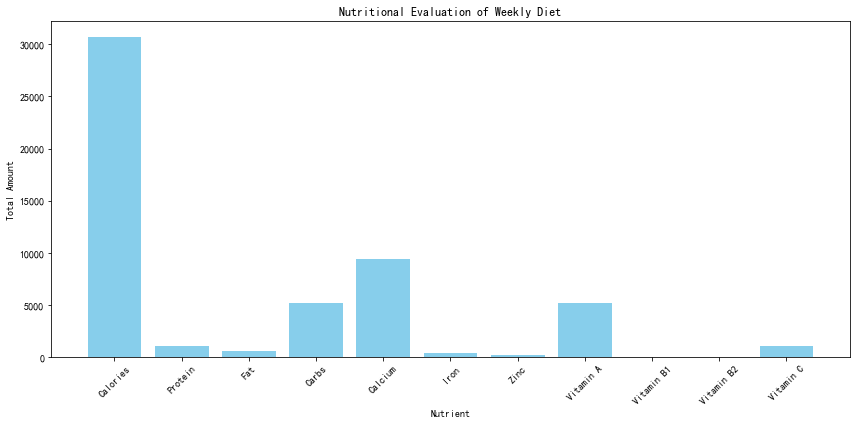

能量与目标值相差: 1177.76%
Calcium 达成率: 1180.14%
Iron 达成率: 2505.87%
Zinc 达成率: 1343.42%
Vitamin_a 达成率: 644.76%
Vitamin_b1 达成率: 1525.00%
Vitamin_b2 达成率: 1031.43%
Vitamin_c 达成率: 1052.45%
蛋白质供能比例: 13.90%
脂肪供能比例: 17.15%
碳水化合物供能比例: 67.78%


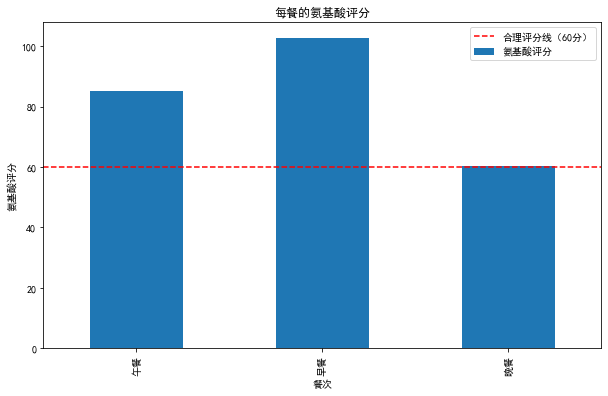

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
# 设置matplotlib绘图时可以显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 使得坐标轴负号显示正常

# 膳食营养评价函数，保留两位小数
def evaluate_nutrition_weekly(selected_foods, selected_quantities, data):
    # 计算总营养成分
    total_calories = round(sum(data.loc[data['食物名称'] == food, '实际摄入能量kcal'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_protein = round(sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_fat = round(sum(data.loc[data['食物名称'] == food, '实际摄入脂肪g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_carbs = round(sum(data.loc[data['食物名称'] == food, '实际摄入碳水化合物g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_calcium = round(sum(data.loc[data['食物名称'] == food, '实际摄入钙（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_iron = round(sum(data.loc[data['食物名称'] == food, '实际摄入铁（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_zinc = round(sum(data.loc[data['食物名称'] == food, '实际摄入锌（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_a = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素A（μg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b1 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B1/硫胺素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b2 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B2/核黄素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_c = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素C（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    
    # 显示总营养成分
    print(f"总能量: {total_calories} kcal")
    print(f"总蛋白质: {total_protein} g")
    print(f"总脂肪: {total_fat} g")
    print(f"总碳水化合物: {total_carbs} g")
    print(f"总钙: {total_calcium} mg")
    print(f"总铁: {total_iron} mg")
    print(f"总锌: {total_zinc} mg")
    print(f"总维生素A: {total_vitamin_a} μg")
    print(f"总维生素B1: {total_vitamin_b1} mg")
    print(f"总维生素B2: {total_vitamin_b2} mg")
    print(f"总维生素C: {total_vitamin_c} mg")

    # 可视化
    labels = ['Calories', 'Protein', 'Fat', 'Carbs', 'Calcium', 'Iron', 'Zinc', 'Vitamin A', 'Vitamin B1', 'Vitamin B2', 'Vitamin C']
    values = [total_calories, total_protein, total_fat, total_carbs, total_calcium, total_iron, total_zinc, total_vitamin_a, total_vitamin_b1, total_vitamin_b2, total_vitamin_c]

    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Nutrient')
    plt.ylabel('Total Amount')
    plt.title('Nutritional Evaluation of Weekly Diet')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('女生优化后的周营养素评价图.png')
    plt.show()

    return {
        'total_calories': total_calories,
        'total_protein': total_protein,
        'total_fat': total_fat,
        'total_carbs': total_carbs,
        'total_calcium': total_calcium,
        'total_iron': total_iron,
        'total_zinc': total_zinc,
        'total_vitamin_a': total_vitamin_a,
        'total_vitamin_b1': total_vitamin_b1,
        'total_vitamin_b2': total_vitamin_b2,
        'total_vitamin_c': total_vitamin_c
    }

# 评价能量、餐次比及非产能主要营养素含量
def evaluate_energy_and_nutrients(nutrition_results, target_calories=2400):
    energy_diff = (nutrition_results['total_calories'] - target_calories) / target_calories * 100
    print(f"能量与目标值相差: {energy_diff:.2f}%")
    
    # 定义参考摄入量
    reference_intake = {
        'calcium': 800,  # mg
        'iron': 15,      # mg
        'zinc': 12,      # mg
        'vitamin_a': 800,  # μg
        'vitamin_b1': 1.4, # mg
        'vitamin_b2': 1.4, # mg
        'vitamin_c': 100   # mg
    }
    
    # 计算营养素达成率
    intake_ratio = {nutrient: (nutrition_results[f'total_{nutrient}'] / ref) * 100 for nutrient, ref in reference_intake.items()}
    
    # 打印营养素达成率
    for nutrient, ratio in intake_ratio.items():
        print(f"{nutrient.capitalize()} 达成率: {ratio:.2f}%")
    
    return intake_ratio

# 评价能量来源
def evaluate_energy_sources(nutrition_results):
    total_energy = nutrition_results['total_calories']
    protein_energy = 4 * nutrition_results['total_protein']
    fat_energy = 9 * nutrition_results['total_fat']
    carb_energy = 4 * nutrition_results['total_carbs']
    
    protein_pct = protein_energy / total_energy * 100
    fat_pct = fat_energy / total_energy * 100
    carb_pct = carb_energy / total_energy * 100
    
    print(f"蛋白质供能比例: {protein_pct:.2f}%")
    print(f"脂肪供能比例: {fat_pct:.2f}%")
    print(f"碳水化合物供能比例: {carb_pct:.2f}%")
    
    # 参考值
    ref_protein_pct = (10, 15)
    ref_fat_pct = (20, 30)
    ref_carb_pct = (50, 65)
    
    return {
        'protein_pct': protein_pct,
        'fat_pct': fat_pct,
        'carb_pct': carb_pct
    }

# 参考蛋白质氨基酸评分模式
reference_aa = {
    '异亮氨酸（mg）': 40,
    '亮氨酸（mg）': 70,
    '赖氨酸（mg）': 55,
    '含硫氨基酸（mg）': 35,
    '芳香族氨基酸（mg）': 60,
    '苏氨酸（mg）': 40,
    '色氨酸（mg）': 10,
    '缬氨酸（mg）': 50
}

# 评价每餐的蛋白质氨基酸评分
def evaluate_amino_acid_scores_weekly(selected_foods, selected_quantities, selected_meals, data):
    amino_acid_scores = {}
    
    meals = data['餐次'].unique()
    for meal in meals:
        meal_foods = [food for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]
        meal_quantities = [qty for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]
        
        total_lysine = sum(data.loc[data['食物名称'] == food, '实际摄入赖氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_leucine = sum(data.loc[data['食物名称'] == food, '实际摄入亮氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_isoleucine = sum(data.loc[data['食物名称'] == food, '实际摄入异亮氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_sulfur = sum(data.loc[data['食物名称'] == food, '实际摄入含硫氨基酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_aromatic = sum(data.loc[data['食物名称'] == food, '实际摄入芳香族氨基酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_threonine = sum(data.loc[data['食物名称'] == food, '实际摄入苏氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_tryptophan = sum(data.loc[data['食物名称'] == food, '实际摄入色氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_valine = sum(data.loc[data['食物名称'] == food, '实际摄入缬氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        
        # 计算每餐蛋白质总量
        total_protein = sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        
        # 将氨基酸含量从mg/100g食物转换为mg/g蛋白质
        total_lysine /= total_protein
        total_leucine /= total_protein
        total_isoleucine /= total_protein
        total_sulfur /= total_protein
        total_aromatic /= total_protein
        total_threonine /= total_protein
        total_tryptophan /= total_protein
        total_valine /= total_protein
        
        # 计算每餐氨基酸评分
        lysine_score = total_lysine / reference_aa['赖氨酸（mg）'] * 100
        leucine_score = total_leucine / reference_aa['亮氨酸（mg）'] * 100
        isoleucine_score = total_isoleucine / reference_aa['异亮氨酸（mg）'] * 100
        sulfur_score = total_sulfur / reference_aa['含硫氨基酸（mg）'] * 100
        aromatic_score = total_aromatic / reference_aa['芳香族氨基酸（mg）'] * 100
        threonine_score = total_threonine / reference_aa['苏氨酸（mg）'] * 100
        tryptophan_score = total_tryptophan / reference_aa['色氨酸（mg）'] * 100
        valine_score = total_valine / reference_aa['缬氨酸（mg）'] * 100
        
        # 计算综合氨基酸评分（取最低值）
        amino_acid_score = min(lysine_score, leucine_score, isoleucine_score, sulfur_score, aromatic_score, threonine_score, tryptophan_score, valine_score)
        
        amino_acid_scores[meal] = round(amino_acid_score, 2)
        print(f"{meal} 的蛋白质氨基酸评分: {amino_acid_scores[meal]}")
    
    return amino_acid_scores

# 调用函数进行每餐蛋白质氨基酸评分评价
amino_acid_scores_weekly = evaluate_amino_acid_scores_weekly(selected_foods, selected_quantities, selected_meals, data)

# 计算并显示每周食谱的综合评价结果
nutrition_results_weekly = evaluate_nutrition_weekly(selected_foods_total, selected_quantities_total, df_new)

# 调用函数进行能量和营养素评价
intake_ratios_weekly = evaluate_energy_and_nutrients(nutrition_results_weekly)

# 调用函数进行能量来源评价
energy_sources_weekly = evaluate_energy_sources(nutrition_results_weekly)

# 可视化每餐的氨基酸评分
def plot_amino_acid_scores(amino_acid_scores):
    aa_scores_df = pd.DataFrame(amino_acid_scores, index=["氨基酸评分"]).T

    aa_scores_df.plot(kind='bar', figsize=(10, 6))
    plt.title('每餐的氨基酸评分')
    plt.ylabel('氨基酸评分')
    plt.xlabel('餐次')
    plt.axhline(y=60, color='r', linestyle='--', label='合理评分线（60分）')
    plt.legend()
    plt.savefig('优化后女生每餐的氨基酸评分.png',dpi=500)

# 调用函数进行氨基酸评分的可视化
plot_amino_acid_scores(amino_acid_scores_weekly)



In [5]:
import pandas as pd
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpInteger

# 加载数据
df_new = pd.read_excel('合并后的汇总表_更新.xlsx').fillna(method='ffill')
# 定义食物类别
food_types = {
    '大米饭': '谷、薯类', '馒头': '谷、薯类', '花卷': '谷、薯类', '豆浆': '奶、干豆、坚果、种子类及制品',
    '南瓜粥': '蔬菜、菌藻、水果类', '馄饨': '谷、薯类', '鸡排面': '畜、禽、鱼、蛋类及制品', '馄饨面': '谷、薯类',
    '红烧牛肉面': '畜、禽、鱼、蛋类及制品', '砂锅面': '谷、薯类', '包子': '谷、薯类', '馅饼': '谷、薯类',
    '鸡蛋饼': '畜、禽、鱼、蛋类及制品', '土豆丝饼': '谷、薯类', '水煎包': '谷、薯类', '水饺': '谷、薯类',
    '蒸饺': '谷、薯类', '韭菜盒子': '谷、薯类', '鸡蛋柿子汤': '畜、禽、鱼、蛋类及制品', '萝卜粉丝汤': '蔬菜、菌藻、水果类',
    '鱼丸汤': '畜、禽、鱼、蛋类及制品', '菠菜汤': '蔬菜、菌藻、水果类', '拌豆腐': '奶、干豆、坚果、种子类及制品',
    '拌干豆腐': '奶、干豆、坚果、种子类及制品', '拌木耳': '蔬菜、菌藻、水果类', '拌芹菜花生米': '奶、干豆、坚果、种子类及制品',
    '海带炖白菜': '蔬菜、菌藻、水果类', '白菜炖豆腐': '奶、干豆、坚果、种子类及制品', '鸡肉炖土豆胡萝卜': '畜、禽、鱼、蛋类及制品',
    '明太鱼炖豆腐': '畜、禽、鱼、蛋类及制品', '炒芹菜粉': '蔬菜、菌藻、水果类', '香菇炒油菜': '蔬菜、菌藻、水果类',
    '卷心菜炒木耳': '蔬菜、菌藻、水果类', '炒三丝': '蔬菜、菌藻、水果类', '炒豆芽粉条': '蔬菜、菌藻、水果类',
    '木须柿子': '蔬菜、菌藻、水果类', '木须瓜片': '蔬菜、菌藻、水果类', '地三鲜': '蔬菜、菌藻、水果类',
    '炒肉扁豆': '畜、禽、鱼、蛋类及制品', '炒肉蒜台': '畜、禽、鱼、蛋类及制品', '炒肉青椒': '畜、禽、鱼、蛋类及制品',
    '炒肉杏鲍菇': '畜、禽、鱼、蛋类及制品', '炒肉酸菜粉': '畜、禽、鱼、蛋类及制品', '家常豆腐': '奶、干豆、坚果、种子类及制品',
    '溜肉段': '畜、禽、鱼、蛋类及制品', '锅包肉': '畜、禽、鱼、蛋类及制品', '红烧肉': '畜、禽、鱼、蛋类及制品',
    '烧排骨': '畜、禽、鱼、蛋类及制品', '宫保鸡丁': '畜、禽、鱼、蛋类及制品', '炸鸡块': '畜、禽、鱼、蛋类及制品',
    '炒牛肉': '畜、禽、鱼、蛋类及制品', '茄汁沙丁鱼': '畜、禽、鱼、蛋类及制品', '干炸黄花鱼': '畜、禽、鱼、蛋类及制品',
    '红烧带鱼': '畜、禽、鱼、蛋类及制品', '西瓜': '蔬菜、菌藻、水果类', '香蕉': '蔬菜、菌藻、水果类',
    '蜜瓜': '蔬菜、菌藻、水果类', '苹果': '蔬菜、菌藻、水果类', '葡萄': '蔬菜、菌藻、水果类', '牛奶': '奶、干豆、坚果、种子类及制品',
    '酸奶': '奶、干豆、坚果、种子类及制品', '大米粥': '谷、薯类', '小米粥': '谷、薯类', '油条': '谷、薯类',
    '煮鸡蛋': '畜、禽、鱼、蛋类及制品', '煎鸡蛋': '畜、禽、鱼、蛋类及制品', '蒸地瓜': '谷、薯类', '拌菠菜': '蔬菜、菌藻、水果类',
    '拌海带丝': '蔬菜、菌藻、水果类', '拌土豆丝': '蔬菜、菌藻、水果类', '橙子': '蔬菜、菌藻、水果类', '炖海带白菜豆腐': '蔬菜、菌藻、水果类',
    '柚子': '蔬菜、菌藻、水果类'
}

df_new['类别'] = df_new['食物名称'].map(food_types)

# 提取相关数据列用于计算氨基酸评分
protein = df_new['实际摄入蛋白质g'].to_list()
lysine = df_new['实际摄入赖氨酸（mg）'].to_list()
leucine = df_new['实际摄入亮氨酸（mg）'].to_list()
isoleucine = df_new['实际摄入异亮氨酸（mg）'].to_list()
sulfur = df_new['实际摄入含硫氨基酸（mg）'].to_list()
aromatic = df_new['实际摄入芳香族氨基酸（mg）'].to_list()
threonine = df_new['实际摄入苏氨酸（mg）'].to_list()
tryptophan = df_new['实际摄入色氨酸（mg）'].to_list()
valine = df_new['实际摄入缬氨酸（mg）'].to_list()
calories = df_new['实际摄入能量kcal'].to_list()
prices = df_new['价格（元/份）'].to_list()
categories = df_new['类别'].unique()
# 提取相关数据列用于优化
prices = df_new['价格（元/份）'].to_list()
calories = df_new['实际摄入能量kcal'].to_list()
protein = df_new['实际摄入蛋白质g'].to_list()
fat = df_new['实际摄入脂肪g'].to_list()
carbs = df_new['实际摄入碳水化合物g'].to_list()
calcium = df_new['实际摄入钙（mg）'].to_list()
iron = df_new['实际摄入铁（mg）'].to_list()
zinc = df_new['实际摄入锌（mg）'].to_list()
vitamin_a = df_new['实际摄入维生素A（μg）'].to_list()
vitamin_b1 = df_new['实际摄入维生素B1/硫胺素（mg）'].to_list()
vitamin_b2 = df_new['实际摄入维生素B2/核黄素（mg）'].to_list()
vitamin_c = df_new['实际摄入维生素C（mg）'].to_list()
# 选择蛋白质氨基酸评分最高的25种食物
def calculate_amino_acid_score(protein, lysine, leucine, isoleucine, sulfur, aromatic, threonine, tryptophan, valine):
    scores = []
    for i in range(len(protein)):
        lysine_score = lysine[i] / 100
        leucine_score = leucine[i] / 100
        isoleucine_score = isoleucine[i] / 100
        sulfur_score = sulfur[i] / 100
        aromatic_score = aromatic[i] / 100
        threonine_score = threonine[i] / 100
        tryptophan_score = tryptophan[i] / 100
        valine_score = valine[i] / 100
        score = min([lysine_score, leucine_score, isoleucine_score, sulfur_score, aromatic_score, threonine_score, tryptophan_score, valine_score])
        scores.append(score)
    return scores

amino_acid_scores = calculate_amino_acid_score(protein, lysine, leucine, isoleucine, sulfur, aromatic, threonine, tryptophan, valine)
df_new['氨基酸评分'] = amino_acid_scores

# 选择蛋白质氨基酸评分最高的25种食物
selected_foods = df_new.sort_values('氨基酸评分', ascending=False)['食物名称'].unique()[:25]

# 将25种食物均匀分配到一周
distributed_foods = []
for i, food in enumerate(selected_foods):
    day = i % 7
    distributed_foods.append((day, food))

def optimize_daily_diet(day, distributed_foods):
    # 创建优化问题
    model = LpProblem(name=f"diet-problem-day-{day+1}", sense=LpMaximize)

    # 定义决策变量
    x = [LpVariable(f"x{i}", cat=LpInteger, lowBound=0) for i in range(len(prices))]

    # 添加目标函数
    model += lpSum(amino_acid_scores[i] * x[i] for i in range(len(prices))), "Total Amino Acid Score"

    # 添加约束条件
    model += lpSum([x[i] for i in range(len(prices))]) >= 12, f"Min_Food_Types_Day_{day}"

    categories = df_new['类别'].unique()
    for category in categories:
        model += lpSum([x[i] for i in range(len(prices)) if df_new['类别'][i] == category]) >= 1, f"Category_{category}_Constraint_Day_{day}"

    model += lpSum(calories[i] * x[i] for i in range(len(prices))) >= 0.9 * 2400, f"Min_Calories_Day_{day}"
    model += lpSum(calories[i] * x[i] for i in range(len(prices))) <= 1.1 * 2400, f"Max_Calories_Day_{day}"

    model += lpSum(calcium[i] * x[i] for i in range(len(prices))) >= 700, f"Min_Calcium_Day_{day}"
    model += lpSum(calcium[i] * x[i] for i in range(len(prices))) <= 900, f"Max_Calcium_Day_{day}"
    model += lpSum(iron[i] * x[i] for i in range(len(prices))) >= 8, f"Min_Iron_Day_{day}"
    model += lpSum(iron[i] * x[i] for i in range(len(prices))) <= 14, f"Max_Iron_Day_{day}"
    model += lpSum(zinc[i] * x[i] for i in range(len(prices))) >= 8, f"Min_Zinc_Day_{day}"
    model += lpSum(zinc[i] * x[i] for i in range(len(prices))) <= 14, f"Max_Zinc_Day_{day}"
    model += lpSum(vitamin_a[i] * x[i] for i in range(len(prices))) >= 700, f"Min_Vitamin_A_Day_{day}"
    model += lpSum(vitamin_a[i] * x[i] for i in range(len(prices))) <= 900, f"Max_Vitamin_A_Day_{day}"
    model += lpSum(vitamin_b1[i] * x[i] for i in range(len(prices))) >= 1.0, f"Min_Vitamin_B1_Day_{day}"
    model += lpSum(vitamin_b1[i] * x[i] for i in range(len(prices))) <= 1.8, f"Max_Vitamin_B1_Day_{day}"
    model += lpSum(vitamin_b2[i] * x[i] for i in range(len(prices))) >= 1.0, f"Min_Vitamin_B2_Day_{day}"
    model += lpSum(vitamin_b2[i] * x[i] for i in range(len(prices))) <= 1.8, f"Max_Vitamin_B2_Day_{day}"
    model += lpSum(vitamin_c[i] * x[i] for i in range(len(prices))) >= 80, f"Min_Vitamin_C_Day_{day}"
    model += lpSum(vitamin_c[i] * x[i] for i in range(len(prices))) <= 120, f"Max_Vitamin_C_Day_{day}"

    total_energy = [4 * protein[i] + 9 * fat[i] + 4 * carbs[i] for i in range(len(prices))]
    model += lpSum(4 * protein[i] * x[i] for i in range(len(prices))) >= 0.10 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Min_Protein_Day_{day}"
    model += lpSum(4 * protein[i] * x[i] for i in range(len(prices))) <= 0.15 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Max_Protein_Day_{day}"
    model += lpSum(9 * fat[i] * x[i] for i in range(len(prices))) >= 0.20 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Min_Fat_Day_{day}"
    model += lpSum(9 * fat[i] * x[i] for i in range(len(prices))) <= 0.30 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Max_Fat_Day_{day}"
    model += lpSum(4 * carbs[i] * x[i] for i in range(len(prices))) >= 0.50 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Min_Carbs_Day_{day}"
    model += lpSum(4 * carbs[i] * x[i] for i in range(len(prices))) <= 0.65 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Max_Carbs_Day_{day}"

    current_day_foods = [f for f in distributed_foods if f[0] == day]
    for idx, food in enumerate(current_day_foods):
        food_index = df_new[df_new['食物名称'] == food[1]].index[0]
        model += x[food_index] >= 1, f"Include_{food[1]}_Day_{day}_Constraint_{idx}"

    model.solve()

    selected_foods = []
    selected_quantities = []
    selected_meals = []
    selected_prices = []

    for i in range(len(prices)):
        if x[i].varValue > 0:
            selected_foods.append(df_new['食物名称'][i])
            selected_quantities.append(int(x[i].varValue))
            selected_meals.append(df_new['餐次'][i])
            selected_prices.append(prices[i])

    return selected_foods, selected_quantities, selected_meals, selected_prices

# 优化每一天的食谱
selected_foods_total = []
selected_quantities_total = []
selected_meals_total = []
selected_prices_total = []
selected_days_total = []

for day in range(7):
    selected_foods, selected_quantities, selected_meals, selected_prices = optimize_daily_diet(day, distributed_foods)
    selected_foods_total.extend(selected_foods)
    selected_quantities_total.extend(selected_quantities)
    selected_meals_total.extend(selected_meals)
    selected_prices_total.extend(selected_prices)
    selected_days_total.extend([day + 1] * len(selected_foods))

# 检查一周内总食物种类是否大于25
unique_foods_total = list(set(selected_foods_total))
if len(unique_foods_total) < 25:
    # 获取缺少的食物种类数量
    num_additional_foods = 25 - len(unique_foods_total)
    # 获取最便宜的食物种类，并确保它们不在现有的食物种类中
    additional_foods = [food for food in df_new.sort_values('价格（元/份）')['食物名称'].unique() if food not in unique_foods_total][:num_additional_foods]
    
    # 将这些额外食物均匀分配到一周的不同天数和餐次
    for i, food in enumerate(additional_foods):
        day = i % 7
        meal = ['早餐', '午餐', '晚餐'][i % 3]
        selected_foods_total.append(food)
        selected_quantities_total.append(1)
        selected_meals_total.append(meal)
        selected_prices_total.append(df_new[df_new['食物名称'] == food]['价格（元/份）'].values[0])
        selected_days_total.append(day + 1)
        print(f"额外添加 - 第 {day+1} 天 - 食品 {food}: 1 份，餐次：{meal}，单价：{df_new[df_new['食物名称'] == food]['价格（元/份）'].values[0]} 元")

# 生成结果表格
result_df = pd.DataFrame({
    '天数': selected_days_total,
    '餐次': selected_meals_total,
    '食物名称': selected_foods_total,
    '数量（份）': selected_quantities_total,
    '单价（元）': selected_prices_total
})

# 保存结果到Excel文件
result_df.to_excel('优化结果_每周_男_氨基酸最高.xlsx', index=False)

# 显示结果表格
print(result_df)



    天数  餐次    食物名称  数量（份）  单价（元）
0    1  午餐  拌芹菜花生米     15    9.0
1    1  午餐    炒芹菜粉      3    9.0
2    1  午餐    木须瓜片      3   12.0
3    1  午餐     溜肉段      1   32.0
4    1  午餐     红烧肉      1   24.0
..  ..  ..     ...    ...    ...
76   7  午餐      蜜瓜     10    1.0
77   7  午餐      苹果     13    1.0
78   7  早餐      酸奶      2    1.5
79   7  早餐     煮鸡蛋      1    1.0
80   7  早餐     蒸地瓜     11    1.0

[81 rows x 5 columns]


午餐 的蛋白质氨基酸评分: 73.42
早餐 的蛋白质氨基酸评分: 61.38
晚餐 的蛋白质氨基酸评分无法计算，因为总蛋白质为零。
总能量: 18514.63 kcal
总蛋白质: 631.45 g
总脂肪: 424.41 g
总碳水化合物: 2894.03 g
总钙: 5892.9 mg
总铁: 131.79 mg
总锌: 75.06 mg
总维生素A: 5925.45 μg
总维生素B1: 12.63 mg
总维生素B2: 9.8 mg
总维生素C: 1013.95 mg


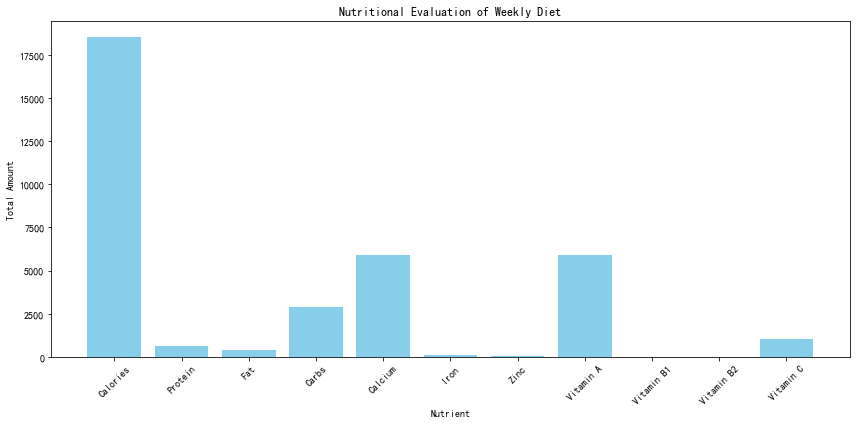

能量与目标值相差: 671.44%
Calcium 达成率: 736.61%
Iron 达成率: 878.60%
Zinc 达成率: 625.50%
Vitamin_a 达成率: 740.68%
Vitamin_b1 达成率: 902.14%
Vitamin_b2 达成率: 700.00%
Vitamin_c 达成率: 1013.95%
蛋白质供能比例: 13.64%
脂肪供能比例: 20.63%
碳水化合物供能比例: 62.52%


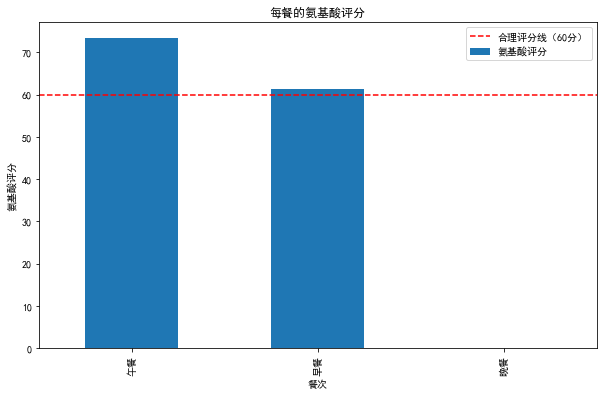

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 计算氨基酸评分的函数
def evaluate_amino_acid_scores_weekly(selected_foods, selected_quantities, selected_meals, data):
    reference_aa = {
        '异亮氨酸（mg）': 40,
        '亮氨酸（mg）': 70,
        '赖氨酸（mg）': 55,
        '含硫氨基酸（mg）': 35,
        '芳香族氨基酸（mg）': 60,
        '苏氨酸（mg）': 40,
        '色氨酸（mg）': 10,
        '缬氨酸（mg）': 50
    }

    meals = data['餐次'].unique()
    amino_acid_scores = {}

    for meal in meals:
        meal_foods = [food for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]
        meal_quantities = [qty for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]
        
        total_lysine = sum(data.loc[data['食物名称'] == food, '实际摄入赖氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_leucine = sum(data.loc[data['食物名称'] == food, '实际摄入亮氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_isoleucine = sum(data.loc[data['食物名称'] == food, '实际摄入异亮氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_sulfur = sum(data.loc[data['食物名称'] == food, '实际摄入含硫氨基酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_aromatic = sum(data.loc[data['食物名称'] == food, '实际摄入芳香族氨基酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_threonine = sum(data.loc[data['食物名称'] == food, '实际摄入苏氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_tryptophan = sum(data.loc[data['食物名称'] == food, '实际摄入色氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_valine = sum(data.loc[data['食物名称'] == food, '实际摄入缬氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        
        # 计算每餐蛋白质总量
        total_protein = sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        
        if total_protein > 0:
            # 将氨基酸含量从mg/100g食物转换为mg/g蛋白质
            total_lysine /= total_protein
            total_leucine /= total_protein
            total_isoleucine /= total_protein
            total_sulfur /= total_protein
            total_aromatic /= total_protein
            total_threonine /= total_protein
            total_tryptophan /= total_protein
            total_valine /= total_protein
            
            # 计算每餐氨基酸评分
            lysine_score = total_lysine / reference_aa['赖氨酸（mg）'] * 100
            leucine_score = total_leucine / reference_aa['亮氨酸（mg）'] * 100
            isoleucine_score = total_isoleucine / reference_aa['异亮氨酸（mg）'] * 100
            sulfur_score = total_sulfur / reference_aa['含硫氨基酸（mg）'] * 100
            aromatic_score = total_aromatic / reference_aa['芳香族氨基酸（mg）'] * 100
            threonine_score = total_threonine / reference_aa['苏氨酸（mg）'] * 100
            tryptophan_score = total_tryptophan / reference_aa['色氨酸（mg）'] * 100
            valine_score = total_valine / reference_aa['缬氨酸（mg）'] * 100
            
            # 计算综合氨基酸评分（取最低值）
            amino_acid_score = min(lysine_score, leucine_score, isoleucine_score, sulfur_score, aromatic_score, threonine_score, tryptophan_score, valine_score)
            
            amino_acid_scores[meal] = round(amino_acid_score, 2)
            print(f"{meal} 的蛋白质氨基酸评分: {amino_acid_scores[meal]}")
        else:
            amino_acid_scores[meal] = 0
            print(f"{meal} 的蛋白质氨基酸评分无法计算，因为总蛋白质为零。")
    
    return amino_acid_scores

# 调用函数进行每餐蛋白质氨基酸评分评价
amino_acid_scores_weekly = evaluate_amino_acid_scores_weekly(selected_foods, selected_quantities, selected_meals, df_new)

# 计算并显示每周食谱的综合评价结果
nutrition_results_weekly = evaluate_nutrition_weekly(selected_foods_total, selected_quantities_total, df_new)

# 调用函数进行能量和营养素评价
intake_ratios_weekly = evaluate_energy_and_nutrients(nutrition_results_weekly)

# 调用函数进行能量来源评价
energy_sources_weekly = evaluate_energy_sources(nutrition_results_weekly)

# 可视化每餐的氨基酸评分
plot_amino_acid_scores(amino_acid_scores_weekly)


In [7]:
import pandas as pd
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpInteger

# 加载数据
df_new = pd.read_excel('合并后的汇总表_更新.xlsx')
# 定义食物类别
food_types = {
    '大米饭': '谷、薯类', '馒头': '谷、薯类', '花卷': '谷、薯类', '豆浆': '奶、干豆、坚果、种子类及制品',
    '南瓜粥': '蔬菜、菌藻、水果类', '馄饨': '谷、薯类', '鸡排面': '畜、禽、鱼、蛋类及制品', '馄饨面': '谷、薯类',
    '红烧牛肉面': '畜、禽、鱼、蛋类及制品', '砂锅面': '谷、薯类', '包子': '谷、薯类', '馅饼': '谷、薯类',
    '鸡蛋饼': '畜、禽、鱼、蛋类及制品', '土豆丝饼': '谷、薯类', '水煎包': '谷、薯类', '水饺': '谷、薯类',
    '蒸饺': '谷、薯类', '韭菜盒子': '谷、薯类', '鸡蛋柿子汤': '畜、禽、鱼、蛋类及制品', '萝卜粉丝汤': '蔬菜、菌藻、水果类',
    '鱼丸汤': '畜、禽、鱼、蛋类及制品', '菠菜汤': '蔬菜、菌藻、水果类', '拌豆腐': '奶、干豆、坚果、种子类及制品',
    '拌干豆腐': '奶、干豆、坚果、种子类及制品', '拌木耳': '蔬菜、菌藻、水果类', '拌芹菜花生米': '奶、干豆、坚果、种子类及制品',
    '海带炖白菜': '蔬菜、菌藻、水果类', '白菜炖豆腐': '奶、干豆、坚果、种子类及制品', '鸡肉炖土豆胡萝卜': '畜、禽、鱼、蛋类及制品',
    '明太鱼炖豆腐': '畜、禽、鱼、蛋类及制品', '炒芹菜粉': '蔬菜、菌藻、水果类', '香菇炒油菜': '蔬菜、菌藻、水果类',
    '卷心菜炒木耳': '蔬菜、菌藻、水果类', '炒三丝': '蔬菜、菌藻、水果类', '炒豆芽粉条': '蔬菜、菌藻、水果类',
    '木须柿子': '蔬菜、菌藻、水果类', '木须瓜片': '蔬菜、菌藻、水果类', '地三鲜': '蔬菜、菌藻、水果类',
    '炒肉扁豆': '畜、禽、鱼、蛋类及制品', '炒肉蒜台': '畜、禽、鱼、蛋类及制品', '炒肉青椒': '畜、禽、鱼、蛋类及制品',
    '炒肉杏鲍菇': '畜、禽、鱼、蛋类及制品', '炒肉酸菜粉': '畜、禽、鱼、蛋类及制品', '家常豆腐': '奶、干豆、坚果、种子类及制品',
    '溜肉段': '畜、禽、鱼、蛋类及制品', '锅包肉': '畜、禽、鱼、蛋类及制品', '红烧肉': '畜、禽、鱼、蛋类及制品',
    '烧排骨': '畜、禽、鱼、蛋类及制品', '宫保鸡丁': '畜、禽、鱼、蛋类及制品', '炸鸡块': '畜、禽、鱼、蛋类及制品',
    '炒牛肉': '畜、禽、鱼、蛋类及制品', '茄汁沙丁鱼': '畜、禽、鱼、蛋类及制品', '干炸黄花鱼': '畜、禽、鱼、蛋类及制品',
    '红烧带鱼': '畜、禽、鱼、蛋类及制品', '西瓜': '蔬菜、菌藻、水果类', '香蕉': '蔬菜、菌藻、水果类',
    '蜜瓜': '蔬菜、菌藻、水果类', '苹果': '蔬菜、菌藻、水果类', '葡萄': '蔬菜、菌藻、水果类', '牛奶': '奶、干豆、坚果、种子类及制品',
    '酸奶': '奶、干豆、坚果、种子类及制品', '大米粥': '谷、薯类', '小米粥': '谷、薯类', '油条': '谷、薯类',
    '煮鸡蛋': '畜、禽、鱼、蛋类及制品', '煎鸡蛋': '畜、禽、鱼、蛋类及制品', '蒸地瓜': '谷、薯类', '拌菠菜': '蔬菜、菌藻、水果类',
    '拌海带丝': '蔬菜、菌藻、水果类', '拌土豆丝': '蔬菜、菌藻、水果类', '橙子': '蔬菜、菌藻、水果类', '炖海带白菜豆腐': '蔬菜、菌藻、水果类',
    '柚子': '蔬菜、菌藻、水果类'
}

df_new['类别'] = df_new['食物名称'].map(food_types)

# 提取相关数据列用于计算氨基酸评分
protein = df_new['实际摄入蛋白质g'].to_list()
lysine = df_new['实际摄入赖氨酸（mg）'].to_list()
leucine = df_new['实际摄入亮氨酸（mg）'].to_list()
isoleucine = df_new['实际摄入异亮氨酸（mg）'].to_list()
sulfur = df_new['实际摄入含硫氨基酸（mg）'].to_list()
aromatic = df_new['实际摄入芳香族氨基酸（mg）'].to_list()
threonine = df_new['实际摄入苏氨酸（mg）'].to_list()
tryptophan = df_new['实际摄入色氨酸（mg）'].to_list()
valine = df_new['实际摄入缬氨酸（mg）'].to_list()
calories = df_new['实际摄入能量kcal'].to_list()
prices = df_new['价格（元/份）'].to_list()
categories = df_new['类别'].unique()
# 提取相关数据列用于优化
prices = df_new['价格（元/份）'].to_list()
calories = df_new['实际摄入能量kcal'].to_list()
protein = df_new['实际摄入蛋白质g'].to_list()
fat = df_new['实际摄入脂肪g'].to_list()
carbs = df_new['实际摄入碳水化合物g'].to_list()
calcium = df_new['实际摄入钙（mg）'].to_list()
iron = df_new['实际摄入铁（mg）'].to_list()
zinc = df_new['实际摄入锌（mg）'].to_list()
vitamin_a = df_new['实际摄入维生素A（μg）'].to_list()
vitamin_b1 = df_new['实际摄入维生素B1/硫胺素（mg）'].to_list()
vitamin_b2 = df_new['实际摄入维生素B2/核黄素（mg）'].to_list()
vitamin_c = df_new['实际摄入维生素C（mg）'].to_list()
# 选择蛋白质氨基酸评分最高的25种食物
def calculate_amino_acid_score(protein, lysine, leucine, isoleucine, sulfur, aromatic, threonine, tryptophan, valine):
    scores = []
    for i in range(len(protein)):
        lysine_score = lysine[i] / 100
        leucine_score = leucine[i] / 100
        isoleucine_score = isoleucine[i] / 100
        sulfur_score = sulfur[i] / 100
        aromatic_score = aromatic[i] / 100
        threonine_score = threonine[i] / 100
        tryptophan_score = tryptophan[i] / 100
        valine_score = valine[i] / 100
        score = min([lysine_score, leucine_score, isoleucine_score, sulfur_score, aromatic_score, threonine_score, tryptophan_score, valine_score])
        scores.append(score)
    return scores

amino_acid_scores = calculate_amino_acid_score(protein, lysine, leucine, isoleucine, sulfur, aromatic, threonine, tryptophan, valine)
df_new['氨基酸评分'] = amino_acid_scores

# 选择蛋白质氨基酸评分最高的25种食物
selected_foods = df_new.sort_values('氨基酸评分', ascending=False)['食物名称'].unique()[:25]

# 将25种食物均匀分配到一周
distributed_foods = []
for i, food in enumerate(selected_foods):
    day = i % 7
    distributed_foods.append((day, food))

def optimize_daily_diet(day, distributed_foods):
    # 创建优化问题
    model = LpProblem(name=f"diet-problem-day-{day+1}", sense=LpMaximize)

    # 定义决策变量
    x = [LpVariable(f"x{i}", cat=LpInteger, lowBound=0) for i in range(len(prices))]

    # 添加目标函数
    model += lpSum(amino_acid_scores[i] * x[i] for i in range(len(prices))), "Total Amino Acid Score"

    # 添加约束条件
    model += lpSum([x[i] for i in range(len(prices))]) >= 12, f"Min_Food_Types_Day_{day}"

    categories = df_new['类别'].unique()
    for category in categories:
        model += lpSum([x[i] for i in range(len(prices)) if df_new['类别'][i] == category]) >= 1, f"Category_{category}_Constraint_Day_{day}"

    model += lpSum(calories[i] * x[i] for i in range(len(prices))) >= 0.9 * 1900, f"Min_Calories_Day_{day}"
    model += lpSum(calories[i] * x[i] for i in range(len(prices))) <= 1.1 * 1900, f"Max_Calories_Day_{day}"

    model += lpSum(calcium[i] * x[i] for i in range(len(prices))) >= 700, f"Min_Calcium_Day_{day}"
    model += lpSum(calcium[i] * x[i] for i in range(len(prices))) <= 900, f"Max_Calcium_Day_{day}"
    model += lpSum(iron[i] * x[i] for i in range(len(prices))) >= 8, f"Min_Iron_Day_{day}"
    model += lpSum(iron[i] * x[i] for i in range(len(prices))) <= 14, f"Max_Iron_Day_{day}"
    model += lpSum(zinc[i] * x[i] for i in range(len(prices))) >= 8, f"Min_Zinc_Day_{day}"
    model += lpSum(zinc[i] * x[i] for i in range(len(prices))) <= 14, f"Max_Zinc_Day_{day}"
    model += lpSum(vitamin_a[i] * x[i] for i in range(len(prices))) >= 700, f"Min_Vitamin_A_Day_{day}"
    model += lpSum(vitamin_a[i] * x[i] for i in range(len(prices))) <= 900, f"Max_Vitamin_A_Day_{day}"
    model += lpSum(vitamin_b1[i] * x[i] for i in range(len(prices))) >= 1.0, f"Min_Vitamin_B1_Day_{day}"
    model += lpSum(vitamin_b1[i] * x[i] for i in range(len(prices))) <= 1.8, f"Max_Vitamin_B1_Day_{day}"
    model += lpSum(vitamin_b2[i] * x[i] for i in range(len(prices))) >= 1.0, f"Min_Vitamin_B2_Day_{day}"
    model += lpSum(vitamin_b2[i] * x[i] for i in range(len(prices))) <= 1.8, f"Max_Vitamin_B2_Day_{day}"
    model += lpSum(vitamin_c[i] * x[i] for i in range(len(prices))) >= 80, f"Min_Vitamin_C_Day_{day}"
    model += lpSum(vitamin_c[i] * x[i] for i in range(len(prices))) <= 120, f"Max_Vitamin_C_Day_{day}"

    total_energy = [4 * protein[i] + 9 * fat[i] + 4 * carbs[i] for i in range(len(prices))]
    model += lpSum(4 * protein[i] * x[i] for i in range(len(prices))) >= 0.10 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Min_Protein_Day_{day}"
    model += lpSum(4 * protein[i] * x[i] for i in range(len(prices))) <= 0.15 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Max_Protein_Day_{day}"
    model += lpSum(9 * fat[i] * x[i] for i in range(len(prices))) >= 0.20 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Min_Fat_Day_{day}"
    model += lpSum(9 * fat[i] * x[i] for i in range(len(prices))) <= 0.30 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Max_Fat_Day_{day}"
    model += lpSum(4 * carbs[i] * x[i] for i in range(len(prices))) >= 0.50 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Min_Carbs_Day_{day}"
    model += lpSum(4 * carbs[i] * x[i] for i in range(len(prices))) <= 0.65 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Max_Carbs_Day_{day}"

    current_day_foods = [f for f in distributed_foods if f[0] == day]
    for idx, food in enumerate(current_day_foods):
        food_index = df_new[df_new['食物名称'] == food[1]].index[0]
        model += x[food_index] >= 1, f"Include_{food[1]}_Day_{day}_Constraint_{idx}"

    model.solve()

    selected_foods = []
    selected_quantities = []
    selected_meals = []
    selected_prices = []

    for i in range(len(prices)):
        if x[i].varValue > 0:
            selected_foods.append(df_new['食物名称'][i])
            selected_quantities.append(int(x[i].varValue))
            selected_meals.append(df_new['餐次'][i])
            selected_prices.append(prices[i])

    return selected_foods, selected_quantities, selected_meals, selected_prices

# 优化每一天的食谱
selected_foods_total = []
selected_quantities_total = []
selected_meals_total = []
selected_prices_total = []
selected_days_total = []

for day in range(7):
    selected_foods, selected_quantities, selected_meals, selected_prices = optimize_daily_diet(day, distributed_foods)
    selected_foods_total.extend(selected_foods)
    selected_quantities_total.extend(selected_quantities)
    selected_meals_total.extend(selected_meals)
    selected_prices_total.extend(selected_prices)
    selected_days_total.extend([day + 1] * len(selected_foods))

# 检查一周内总食物种类是否大于25
unique_foods_total = list(set(selected_foods_total))
if len(unique_foods_total) < 25:
    # 获取缺少的食物种类数量
    num_additional_foods = 25 - len(unique_foods_total)
    # 获取最便宜的食物种类，并确保它们不在现有的食物种类中
    additional_foods = [food for food in df_new.sort_values('价格（元/份）')['食物名称'].unique() if food not in unique_foods_total][:num_additional_foods]
    
    # 将这些额外食物均匀分配到一周的不同天数和餐次
    for i, food in enumerate(additional_foods):
        day = i % 7
        meal = ['早餐', '午餐', '晚餐'][i % 3]
        selected_foods_total.append(food)
        selected_quantities_total.append(1)
        selected_meals_total.append(meal)
        selected_prices_total.append(df_new[df_new['食物名称'] == food]['价格（元/份）'].values[0])
        selected_days_total.append(day + 1)
        print(f"额外添加 - 第 {day+1} 天 - 食品 {food}: 1 份，餐次：{meal}，单价：{df_new[df_new['食物名称'] == food]['价格（元/份）'].values[0]} 元")

# 生成结果表格
result_df = pd.DataFrame({
    '天数': selected_days_total,
    '餐次': selected_meals_total,
    '食物名称': selected_foods_total,
    '数量（份）': selected_quantities_total,
    '单价（元）': selected_prices_total
})

# 保存结果到Excel文件
result_df.to_excel('优化结果_每周_女_氨基酸最高.xlsx', index=False)

# 显示结果表格
print(result_df)



    天数  餐次    食物名称  数量（份）  单价（元）
0    1  午餐   鸡蛋柿子汤      2    8.0
1    1  午餐  拌芹菜花生米     34    9.0
2    1  午餐     溜肉段      1   32.0
3    1  午餐     红烧肉      1   24.0
4    1  午餐     烧排骨      1   24.0
..  ..  ..     ...    ...    ...
70   7  早餐      酸奶      2    1.5
71   7  早餐     煮鸡蛋      1    1.0
72   7  早餐     蒸地瓜      9    1.0
73   7  晚餐      蒸饺      0   32.0
74   7  晚餐     红烧肉      0   24.0

[75 rows x 5 columns]


午餐 的蛋白质氨基酸评分: 40.47
早餐 的蛋白质氨基酸评分: 65.5
晚餐 的蛋白质氨基酸评分无法计算，因为总蛋白质为零。
总能量: 13362.01 kcal
总蛋白质: 446.19 g
总脂肪: 273.41 g
总碳水化合物: 2171.86 g
总钙: 5124.7 mg
总铁: 85.42 mg
总锌: 54.86 mg
总维生素A: 5474.7 μg
总维生素B1: 9.54 mg
总维生素B2: 7.34 mg
总维生素C: 739.5 mg


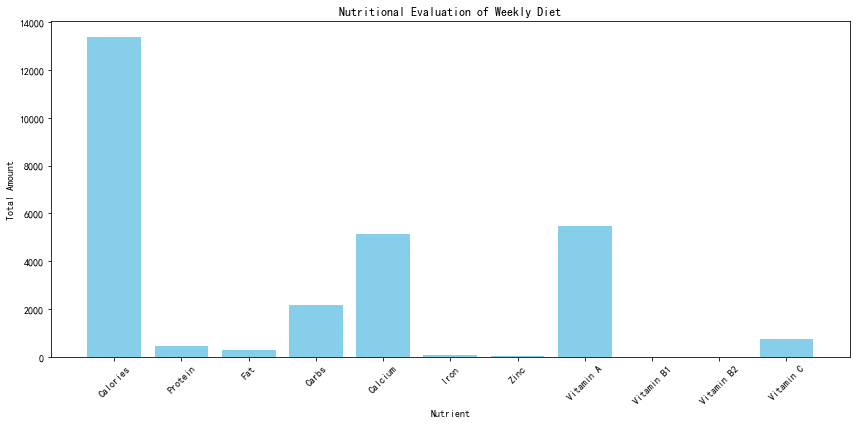

能量与目标值相差: 456.75%
Calcium 达成率: 640.59%
Iron 达成率: 569.47%
Zinc 达成率: 457.17%
Vitamin_a 达成率: 684.34%
Vitamin_b1 达成率: 681.43%
Vitamin_b2 达成率: 524.29%
Vitamin_c 达成率: 739.50%
蛋白质供能比例: 13.36%
脂肪供能比例: 18.42%
碳水化合物供能比例: 65.02%


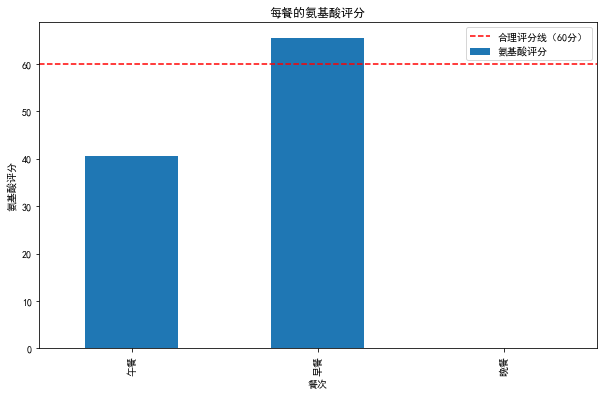

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 计算氨基酸评分的函数
def evaluate_amino_acid_scores_weekly(selected_foods, selected_quantities, selected_meals, data):
    reference_aa = {
        '异亮氨酸（mg）': 40,
        '亮氨酸（mg）': 70,
        '赖氨酸（mg）': 55,
        '含硫氨基酸（mg）': 35,
        '芳香族氨基酸（mg）': 60,
        '苏氨酸（mg）': 40,
        '色氨酸（mg）': 10,
        '缬氨酸（mg）': 50
    }

    meals = data['餐次'].unique()
    amino_acid_scores = {}

    for meal in meals:
        meal_foods = [food for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]
        meal_quantities = [qty for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]
        
        total_lysine = sum(data.loc[data['食物名称'] == food, '实际摄入赖氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_leucine = sum(data.loc[data['食物名称'] == food, '实际摄入亮氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_isoleucine = sum(data.loc[data['食物名称'] == food, '实际摄入异亮氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_sulfur = sum(data.loc[data['食物名称'] == food, '实际摄入含硫氨基酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_aromatic = sum(data.loc[data['食物名称'] == food, '实际摄入芳香族氨基酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_threonine = sum(data.loc[data['食物名称'] == food, '实际摄入苏氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_tryptophan = sum(data.loc[data['食物名称'] == food, '实际摄入色氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_valine = sum(data.loc[data['食物名称'] == food, '实际摄入缬氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        
        # 计算每餐蛋白质总量
        total_protein = sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        
        if total_protein > 0:
            # 将氨基酸含量从mg/100g食物转换为mg/g蛋白质
            total_lysine /= (total_protein + 1e-9)
            total_leucine /= (total_protein + 1e-9)
            total_isoleucine /= (total_protein + 1e-9)
            total_sulfur /= (total_protein + 1e-9)
            total_aromatic /= (total_protein + 1e-9)
            total_threonine /= (total_protein + 1e-9)
            total_tryptophan /= (total_protein + 1e-9)
            total_valine /= (total_protein + 1e-9)
            
            # 计算每餐氨基酸评分
            lysine_score = total_lysine / reference_aa['赖氨酸（mg）'] * 100
            leucine_score = total_leucine / reference_aa['亮氨酸（mg）'] * 100
            isoleucine_score = total_isoleucine / reference_aa['异亮氨酸（mg）'] * 100
            sulfur_score = total_sulfur / reference_aa['含硫氨基酸（mg）'] * 100
            aromatic_score = total_aromatic / reference_aa['芳香族氨基酸（mg）'] * 100
            threonine_score = total_threonine / reference_aa['苏氨酸（mg）'] * 100
            tryptophan_score = total_tryptophan / reference_aa['色氨酸（mg）'] * 100
            valine_score = total_valine / reference_aa['缬氨酸（mg）'] * 100
            
            # 计算综合氨基酸评分（取最低值）
            amino_acid_score = min(lysine_score, leucine_score, isoleucine_score, sulfur_score, aromatic_score, threonine_score, tryptophan_score, valine_score)
            
            amino_acid_scores[meal] = round(amino_acid_score, 2)
            print(f"{meal} 的蛋白质氨基酸评分: {amino_acid_scores[meal]}")
        else:
            amino_acid_scores[meal] = 0
            print(f"{meal} 的蛋白质氨基酸评分无法计算，因为总蛋白质为零。")
    
    return amino_acid_scores

# 调用函数进行每餐蛋白质氨基酸评分评价
amino_acid_scores_weekly = evaluate_amino_acid_scores_weekly(selected_foods, selected_quantities, selected_meals, df_new)

# 计算并显示每周食谱的综合评价结果
nutrition_results_weekly = evaluate_nutrition_weekly(selected_foods_total, selected_quantities_total, df_new)

# 调用函数进行能量和营养素评价
intake_ratios_weekly = evaluate_energy_and_nutrients(nutrition_results_weekly)

# 调用函数进行能量来源评价
energy_sources_weekly = evaluate_energy_sources(nutrition_results_weekly)

# 可视化每餐的氨基酸评分
plot_amino_acid_scores(amino_acid_scores_weekly)


In [9]:
import pandas as pd
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpInteger

# 加载数据
df_new = pd.read_excel('合并后的汇总表_更新.xlsx')
# 定义食物类别
food_types = {
    '大米饭': '谷、薯类', '馒头': '谷、薯类', '花卷': '谷、薯类', '豆浆': '奶、干豆、坚果、种子类及制品',
    '南瓜粥': '蔬菜、菌藻、水果类', '馄饨': '谷、薯类', '鸡排面': '畜、禽、鱼、蛋类及制品', '馄饨面': '谷、薯类',
    '红烧牛肉面': '畜、禽、鱼、蛋类及制品', '砂锅面': '谷、薯类', '包子': '谷、薯类', '馅饼': '谷、薯类',
    '鸡蛋饼': '畜、禽、鱼、蛋类及制品', '土豆丝饼': '谷、薯类', '水煎包': '谷、薯类', '水饺': '谷、薯类',
    '蒸饺': '谷、薯类', '韭菜盒子': '谷、薯类', '鸡蛋柿子汤': '畜、禽、鱼、蛋类及制品', '萝卜粉丝汤': '蔬菜、菌藻、水果类',
    '鱼丸汤': '畜、禽、鱼、蛋类及制品', '菠菜汤': '蔬菜、菌藻、水果类', '拌豆腐': '奶、干豆、坚果、种子类及制品',
    '拌干豆腐': '奶、干豆、坚果、种子类及制品', '拌木耳': '蔬菜、菌藻、水果类', '拌芹菜花生米': '奶、干豆、坚果、种子类及制品',
    '海带炖白菜': '蔬菜、菌藻、水果类', '白菜炖豆腐': '奶、干豆、坚果、种子类及制品', '鸡肉炖土豆胡萝卜': '畜、禽、鱼、蛋类及制品',
    '明太鱼炖豆腐': '畜、禽、鱼、蛋类及制品', '炒芹菜粉': '蔬菜、菌藻、水果类', '香菇炒油菜': '蔬菜、菌藻、水果类',
    '卷心菜炒木耳': '蔬菜、菌藻、水果类', '炒三丝': '蔬菜、菌藻、水果类', '炒豆芽粉条': '蔬菜、菌藻、水果类',
    '木须柿子': '蔬菜、菌藻、水果类', '木须瓜片': '蔬菜、菌藻、水果类', '地三鲜': '蔬菜、菌藻、水果类',
    '炒肉扁豆': '畜、禽、鱼、蛋类及制品', '炒肉蒜台': '畜、禽、鱼、蛋类及制品', '炒肉青椒': '畜、禽、鱼、蛋类及制品',
    '炒肉杏鲍菇': '畜、禽、鱼、蛋类及制品', '炒肉酸菜粉': '畜、禽、鱼、蛋类及制品', '家常豆腐': '奶、干豆、坚果、种子类及制品',
    '溜肉段': '畜、禽、鱼、蛋类及制品', '锅包肉': '畜、禽、鱼、蛋类及制品', '红烧肉': '畜、禽、鱼、蛋类及制品',
    '烧排骨': '畜、禽、鱼、蛋类及制品', '宫保鸡丁': '畜、禽、鱼、蛋类及制品', '炸鸡块': '畜、禽、鱼、蛋类及制品',
    '炒牛肉': '畜、禽、鱼、蛋类及制品', '茄汁沙丁鱼': '畜、禽、鱼、蛋类及制品', '干炸黄花鱼': '畜、禽、鱼、蛋类及制品',
    '红烧带鱼': '畜、禽、鱼、蛋类及制品', '西瓜': '蔬菜、菌藻、水果类', '香蕉': '蔬菜、菌藻、水果类',
    '蜜瓜': '蔬菜、菌藻、水果类', '苹果': '蔬菜、菌藻、水果类', '葡萄': '蔬菜、菌藻、水果类', '牛奶': '奶、干豆、坚果、种子类及制品',
    '酸奶': '奶、干豆、坚果、种子类及制品', '大米粥': '谷、薯类', '小米粥': '谷、薯类', '油条': '谷、薯类',
    '煮鸡蛋': '畜、禽、鱼、蛋类及制品', '煎鸡蛋': '畜、禽、鱼、蛋类及制品', '蒸地瓜': '谷、薯类', '拌菠菜': '蔬菜、菌藻、水果类',
    '拌海带丝': '蔬菜、菌藻、水果类', '拌土豆丝': '蔬菜、菌藻、水果类', '橙子': '蔬菜、菌藻、水果类', '炖海带白菜豆腐': '蔬菜、菌藻、水果类',
    '柚子': '蔬菜、菌藻、水果类'
}

df_new['类别'] = df_new['食物名称'].map(food_types)

# 提取相关数据列用于计算氨基酸评分
protein = df_new['实际摄入蛋白质g'].to_list()
lysine = df_new['实际摄入赖氨酸（mg）'].to_list()
leucine = df_new['实际摄入亮氨酸（mg）'].to_list()
isoleucine = df_new['实际摄入异亮氨酸（mg）'].to_list()
sulfur = df_new['实际摄入含硫氨基酸（mg）'].to_list()
aromatic = df_new['实际摄入芳香族氨基酸（mg）'].to_list()
threonine = df_new['实际摄入苏氨酸（mg）'].to_list()
tryptophan = df_new['实际摄入色氨酸（mg）'].to_list()
valine = df_new['实际摄入缬氨酸（mg）'].to_list()
calories = df_new['实际摄入能量kcal'].to_list()
prices = df_new['价格（元/份）'].to_list()
categories = df_new['类别'].unique()
# 提取相关数据列用于优化
prices = df_new['价格（元/份）'].to_list()
calories = df_new['实际摄入能量kcal'].to_list()
protein = df_new['实际摄入蛋白质g'].to_list()
fat = df_new['实际摄入脂肪g'].to_list()
carbs = df_new['实际摄入碳水化合物g'].to_list()
calcium = df_new['实际摄入钙（mg）'].to_list()
iron = df_new['实际摄入铁（mg）'].to_list()
zinc = df_new['实际摄入锌（mg）'].to_list()
vitamin_a = df_new['实际摄入维生素A（μg）'].to_list()
vitamin_b1 = df_new['实际摄入维生素B1/硫胺素（mg）'].to_list()
vitamin_b2 = df_new['实际摄入维生素B2/核黄素（mg）'].to_list()
vitamin_c = df_new['实际摄入维生素C（mg）'].to_list()
# 计算氨基酸评分
def calculate_amino_acid_score(protein, lysine, leucine, isoleucine, sulfur, aromatic, threonine, tryptophan, valine):
    scores = []
    for i in range(len(protein)):
        lysine_score = lysine[i] / 100
        leucine_score = leucine[i] / 100
        isoleucine_score = isoleucine[i] / 100
        sulfur_score = sulfur[i] / 100
        aromatic_score = aromatic[i] / 100
        threonine_score = threonine[i] / 100
        tryptophan_score = tryptophan[i] / 100
        valine_score = valine[i] / 100
        score = min([lysine_score, leucine_score, isoleucine_score, sulfur_score, aromatic_score, threonine_score, tryptophan_score, valine_score])
        scores.append(score)
    return scores

amino_acid_scores = calculate_amino_acid_score(protein, lysine, leucine, isoleucine, sulfur, aromatic, threonine, tryptophan, valine)
df_new['氨基酸评分'] = amino_acid_scores

# 计算加权和（假设权重为0.5）
weight_amino_acid = 0.5
weight_price = 0.5
df_new['综合评分'] = weight_amino_acid * df_new['氨基酸评分'] - weight_price * df_new['价格（元/份）']

# 选择综合评分最高的25种食物
selected_foods = df_new.sort_values('综合评分', ascending=False)['食物名称'].unique()[:25]

# 将25种食物均匀分配到一周
distributed_foods = []
for i, food in enumerate(selected_foods):
    day = i % 7
    distributed_foods.append((day, food))

def optimize_daily_diet(day, distributed_foods):
    # 创建优化问题
    model = LpProblem(name=f"diet-problem-day-{day+1}", sense=LpMaximize)

    # 定义决策变量
    x = [LpVariable(f"x{i}", cat=LpInteger, lowBound=0) for i in range(len(prices))]

    # 添加目标函数
    model += lpSum(amino_acid_scores[i] * x[i] for i in range(len(prices))), "Total Amino Acid Score"

    # 添加约束条件
    model += lpSum([x[i] for i in range(len(prices))]) >= 12, f"Min_Food_Types_Day_{day}"

    for category in categories:
        model += lpSum([x[i] for i in range(len(prices)) if df_new['类别'][i] == category]) >= 1, f"Category_{category}_Constraint_Day_{day}"

    model += lpSum(calories[i] * x[i] for i in range(len(prices))) >= 0.9 * 2400, f"Min_Calories_Day_{day}"
    model += lpSum(calories[i] * x[i] for i in range(len(prices))) <= 1.1 * 2400, f"Max_Calories_Day_{day}"

    model += lpSum(calcium[i] * x[i] for i in range(len(prices))) >= 700, f"Min_Calcium_Day_{day}"
    model += lpSum(calcium[i] * x[i] for i in range(len(prices))) <= 900, f"Max_Calcium_Day_{day}"
    model += lpSum(iron[i] * x[i] for i in range(len(prices))) >= 8, f"Min_Iron_Day_{day}"
    model += lpSum(iron[i] * x[i] for i in range(len(prices))) <= 14, f"Max_Iron_Day_{day}"
    model += lpSum(zinc[i] * x[i] for i in range(len(prices))) >= 8, f"Min_Zinc_Day_{day}"
    model += lpSum(zinc[i] * x[i] for i in range(len(prices))) <= 14, f"Max_Zinc_Day_{day}"
    model += lpSum(vitamin_a[i] * x[i] for i in range(len(prices))) >= 700, f"Min_Vitamin_A_Day_{day}"
    model += lpSum(vitamin_a[i] * x[i] for i in range(len(prices))) <= 900, f"Max_Vitamin_A_Day_{day}"
    model += lpSum(vitamin_b1[i] * x[i] for i in range(len(prices))) >= 1.0, f"Min_Vitamin_B1_Day_{day}"
    model += lpSum(vitamin_b1[i] * x[i] for i in range(len(prices))) <= 1.8, f"Max_Vitamin_B1_Day_{day}"
    model += lpSum(vitamin_b2[i] * x[i] for i in range(len(prices))) >= 1.0, f"Min_Vitamin_B2_Day_{day}"
    model += lpSum(vitamin_b2[i] * x[i] for i in range(len(prices))) <= 1.8, f"Max_Vitamin_B2_Day_{day}"
    model += lpSum(vitamin_c[i] * x[i] for i in range(len(prices))) >= 80, f"Min_Vitamin_C_Day_{day}"
    model += lpSum(vitamin_c[i] * x[i] for i in range(len(prices))) <= 120, f"Max_Vitamin_C_Day_{day}"

    total_energy = [4 * protein[i] + 9 * fat[i] + 4 * carbs[i] for i in range(len(prices))]
    model += lpSum(4 * protein[i] * x[i] for i in range(len(prices))) >= 0.10 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Min_Protein_Day_{day}"
    model += lpSum(4 * protein[i] * x[i] for i in range(len(prices))) <= 0.15 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Max_Protein_Day_{day}"
    model += lpSum(9 * fat[i] * x[i] for i in range(len(prices))) >= 0.20 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Min_Fat_Day_{day}"
    model += lpSum(9 * fat[i] * x[i] for i in range(len(prices))) <= 0.30 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Max_Fat_Day_{day}"
    model += lpSum(4 * carbs[i] * x[i] for i in range(len(prices))) >= 0.50 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Min_Carbs_Day_{day}"
    model += lpSum(4 * carbs[i] * x[i] for i in range(len(prices))) <= 0.65 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Max_Carbs_Day_{day}"

    current_day_foods = [f for f in distributed_foods if f[0] == day]
    for idx, food in enumerate(current_day_foods):
        food_index = df_new[df_new['食物名称'] == food[1]].index[0]
        model += x[food_index] >=    1, f"Include_{food[1]}_Day_{day}_Constraint_{idx}"

    # 确保相邻两天的食物不完全相同
    if day > 0:
        prev_day_foods = [f[1] for f in distributed_foods if f[0] == day - 1]
        for idx, food in enumerate(prev_day_foods):
            food_index = df_new[df_new['食物名称'] == food].index[0]
            model += lpSum([x[food_index]]) <= 0, f"Not_Same_as_Day_{day}_Constraint_{idx}"

    # 求解模型
    model.solve()

    selected_foods = []
    selected_quantities = []
    selected_meals = []
    selected_prices = []

    for i in range(len(prices)):
        if x[i].varValue > 0:
            selected_foods.append(df_new['食物名称'][i])
            selected_quantities.append(int(x[i].varValue))
            selected_meals.append(df_new['餐次'][i])
            selected_prices.append(prices[i])

    return selected_foods, selected_quantities, selected_meals, selected_prices

# 优化每一天的食谱
selected_foods_total = []
selected_quantities_total = []
selected_meals_total = []
selected_prices_total = []
selected_days_total = []

for day in range(7):
    selected_foods, selected_quantities, selected_meals, selected_prices = optimize_daily_diet(day, distributed_foods)
    selected_foods_total.extend(selected_foods)
    selected_quantities_total.extend(selected_quantities)
    selected_meals_total.extend(selected_meals)
    selected_prices_total.extend(selected_prices)
    selected_days_total.extend([day + 1] * len(selected_foods))

# 检查一周内总食物种类是否大于25
unique_foods_total = list(set(selected_foods_total))
if len(unique_foods_total) < 25:
    # 获取缺少的食物种类数量
    num_additional_foods = 25 - len(unique_foods_total)
    # 获取最便宜的食物种类，并确保它们不在现有的食物种类中
    additional_foods = [food for food in df_new.sort_values('价格（元/份）')['食物名称'].unique() if food not in unique_foods_total][:num_additional_foods]

    # 将这些额外食物均匀分配到一周的不同天数和餐次
    for i, food in enumerate(additional_foods):
        day = i % 7
        meal = ['早餐', '午餐', '晚餐'][i % 3]
        selected_foods_total.append(food)
        selected_quantities_total.append(1)
        selected_meals_total.append(meal)
        selected_prices_total.append(df_new[df_new['食物名称'] == food]['价格（元/份）'].values[0])
        selected_days_total.append(day + 1)
        print(f"额外添加 - 第 {day+1} 天 - 食品 {food}: 1 份，餐次：{meal}，单价：{df_new[df_new['食物名称'] == food]['价格（元/份）'].values[0]} 元")

# 生成结果表格
result_df = pd.DataFrame({
    '天数': selected_days_total,
    '餐次': selected_meals_total,
    '食物名称': selected_foods_total,
    '数量（份）': selected_quantities_total,
    '单价（元）': selected_prices_total
})

# 保存结果到Excel文件
result_df.to_excel('优化结果_每周_女_综合评分.xlsx', index=False)

# 显示结果表格
print(result_df)



    天数  餐次    食物名称  数量（份）  单价（元）
0    1  午餐     南瓜粥      1    1.0
1    1  午餐  明太鱼炖豆腐      1   15.0
2    1  午餐      蜜瓜      2    1.0
3    1  午餐      苹果      1    1.0
4    1  早餐      酸奶      1    1.5
..  ..  ..     ...    ...    ...
80   7  早餐     蒸地瓜     11    1.0
81   7  晚餐     砂锅面      1   30.0
82   7  晚餐   炒肉杏鲍菇      3   15.0
83   7  晚餐     红烧肉      1   24.0
84   7  晚餐      苹果      8    1.0

[85 rows x 5 columns]


午餐 的蛋白质氨基酸评分: 16.46
早餐 的蛋白质氨基酸评分: 33.8
晚餐 的蛋白质氨基酸评分: 87.08
总能量: 18701.46 kcal
总蛋白质: 680.98 g
总脂肪: 481.83 g
总碳水化合物: 2802.86 g
总钙: 6214.25 mg
总铁: 134.35 mg
总锌: 89.83 mg
总维生素A: 5566.25 μg
总维生素B1: 13.19 mg
总维生素B2: 9.8 mg
总维生素C: 859.45 mg


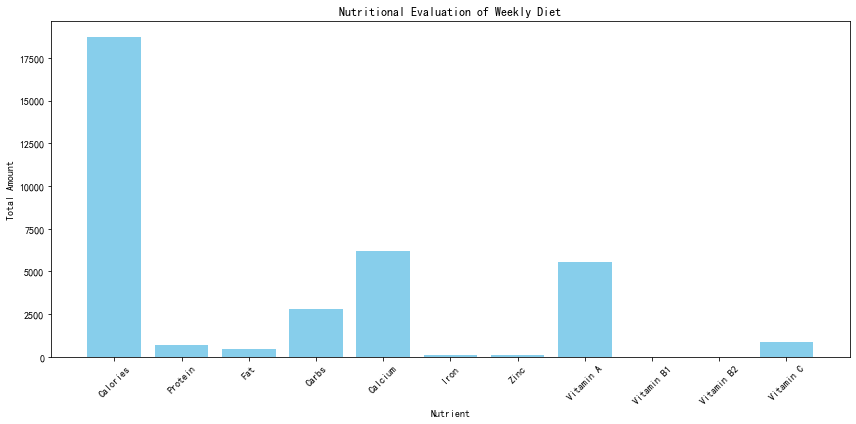

能量与目标值相差: 679.23%
Calcium 达成率: 776.78%
Iron 达成率: 895.67%
Zinc 达成率: 748.58%
Vitamin_a 达成率: 695.78%
Vitamin_b1 达成率: 942.14%
Vitamin_b2 达成率: 700.00%
Vitamin_c 达成率: 859.45%
蛋白质供能比例: 14.57%
脂肪供能比例: 23.19%
碳水化合物供能比例: 59.95%


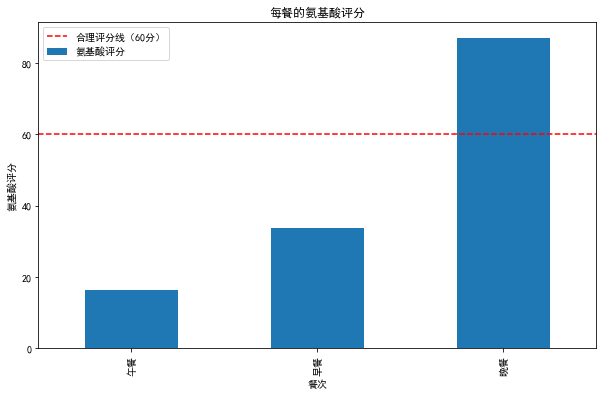

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
# 设置matplotlib绘图时可以显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 使得坐标轴负号显示正常

# 膳食营养评价函数，保留两位小数
def evaluate_nutrition_weekly(selected_foods, selected_quantities, data):
    # 计算总营养成分
    total_calories = round(sum(data.loc[data['食物名称'] == food, '实际摄入能量kcal'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_protein = round(sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_fat = round(sum(data.loc[data['食物名称'] == food, '实际摄入脂肪g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_carbs = round(sum(data.loc[data['食物名称'] == food, '实际摄入碳水化合物g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_calcium = round(sum(data.loc[data['食物名称'] == food, '实际摄入钙（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_iron = round(sum(data.loc[data['食物名称'] == food, '实际摄入铁（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_zinc = round(sum(data.loc[data['食物名称'] == food, '实际摄入锌（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_a = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素A（μg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b1 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B1/硫胺素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b2 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B2/核黄素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_c = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素C（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    
    # 显示总营养成分
    print(f"总能量: {total_calories} kcal")
    print(f"总蛋白质: {total_protein} g")
    print(f"总脂肪: {total_fat} g")
    print(f"总碳水化合物: {total_carbs} g")
    print(f"总钙: {total_calcium} mg")
    print(f"总铁: {total_iron} mg")
    print(f"总锌: {total_zinc} mg")
    print(f"总维生素A: {total_vitamin_a} μg")
    print(f"总维生素B1: {total_vitamin_b1} mg")
    print(f"总维生素B2: {total_vitamin_b2} mg")
    print(f"总维生素C: {total_vitamin_c} mg")

    # 可视化
    labels = ['Calories', 'Protein', 'Fat', 'Carbs', 'Calcium', 'Iron', 'Zinc', 'Vitamin A', 'Vitamin B1', 'Vitamin B2', 'Vitamin C']
    values = [total_calories, total_protein, total_fat, total_carbs, total_calcium, total_iron, total_zinc, total_vitamin_a, total_vitamin_b1, total_vitamin_b2, total_vitamin_c]

    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Nutrient')
    plt.ylabel('Total Amount')
    plt.title('Nutritional Evaluation of Weekly Diet')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('nutritional_evaluation_weekly.png')
    plt.show()

    return {
        'total_calories': total_calories,
        'total_protein': total_protein,
        'total_fat': total_fat,
        'total_carbs': total_carbs,
        'total_calcium': total_calcium,
        'total_iron': total_iron,
        'total_zinc': total_zinc,
        'total_vitamin_a': total_vitamin_a,
        'total_vitamin_b1': total_vitamin_b1,
        'total_vitamin_b2': total_vitamin_b2,
        'total_vitamin_c': total_vitamin_c
    }

# 评价能量、餐次比及非产能主要营养素含量
def evaluate_energy_and_nutrients(nutrition_results, target_calories=2400):
    energy_diff = (nutrition_results['total_calories'] - target_calories) / target_calories * 100
    print(f"能量与目标值相差: {energy_diff:.2f}%")
    
    # 定义参考摄入量
    reference_intake = {
        'calcium': 800,  # mg
        'iron': 15,      # mg
        'zinc': 12,      # mg
        'vitamin_a': 800,  # μg
        'vitamin_b1': 1.4, # mg
        'vitamin_b2': 1.4, # mg
        'vitamin_c': 100   # mg
    }
    
    # 计算营养素达成率
    intake_ratio = {nutrient: (nutrition_results[f'total_{nutrient}'] / ref) * 100 for nutrient, ref in reference_intake.items()}
    
    # 打印营养素达成率
    for nutrient, ratio in intake_ratio.items():
        print(f"{nutrient.capitalize()} 达成率: {ratio:.2f}%")
    
    return intake_ratio

# 评价能量来源
def evaluate_energy_sources(nutrition_results):
    total_energy = nutrition_results['total_calories']
    protein_energy = 4 * nutrition_results['total_protein']
    fat_energy = 9 * nutrition_results['total_fat']
    carb_energy = 4 * nutrition_results['total_carbs']
    
    protein_pct = protein_energy / total_energy * 100
    fat_pct = fat_energy / total_energy * 100
    carb_pct = carb_energy / total_energy * 100
    
    print(f"蛋白质供能比例: {protein_pct:.2f}%")
    print(f"脂肪供能比例: {fat_pct:.2f}%")
    print(f"碳水化合物供能比例: {carb_pct:.2f}%")
    
    # 参考值
    ref_protein_pct = (10, 15)
    ref_fat_pct = (20, 30)
    ref_carb_pct = (50, 65)
    
    return {
        'protein_pct': protein_pct,
        'fat_pct': fat_pct,
        'carb_pct': carb_pct
    }

# 参考蛋白质氨基酸评分模式
reference_aa = {
    '异亮氨酸（mg）': 40,
    '亮氨酸（mg）': 70,
    '赖氨酸（mg）': 55,
    '含硫氨基酸（mg）': 35,
    '芳香族氨基酸（mg）': 60,
    '苏氨酸（mg）': 40,
    '色氨酸（mg）': 10,
    '缬氨酸（mg）': 50
}

# 评价每餐的蛋白质氨基酸评分
def evaluate_amino_acid_scores_weekly(selected_foods, selected_quantities, selected_meals, data):
    amino_acid_scores = {}
    
    meals = data['餐次'].unique()
    for meal in meals:
        meal_foods = [food for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]
        meal_quantities = [qty for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]
        
        total_lysine = sum(data.loc[data['食物名称'] == food, '实际摄入赖氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_leucine = sum(data.loc[data['食物名称'] == food, '实际摄入亮氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_isoleucine = sum(data.loc[data['食物名称'] == food, '实际摄入异亮氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_sulfur = sum(data.loc[data['食物名称'] == food, '实际摄入含硫氨基酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_aromatic = sum(data.loc[data['食物名称'] == food, '实际摄入芳香族氨基酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_threonine = sum(data.loc[data['食物名称'] == food, '实际摄入苏氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_tryptophan = sum(data.loc[data['食物名称'] == food, '实际摄入色氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_valine = sum(data.loc[data['食物名称'] == food, '实际摄入缬氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        
        # 计算每餐蛋白质总量
        total_protein = sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        
        # 将氨基酸含量从mg/100g食物转换为mg/g蛋白质
        total_lysine /= total_protein
        total_leucine /= total_protein
        total_isoleucine /= total_protein
        total_sulfur /= total_protein
        total_aromatic /= total_protein
        total_threonine /= total_protein
        total_tryptophan /= total_protein
        total_valine /= total_protein
        
        # 计算每餐氨基酸评分
        lysine_score = total_lysine / reference_aa['赖氨酸（mg）'] * 100
        leucine_score = total_leucine / reference_aa['亮氨酸（mg）'] * 100
        isoleucine_score = total_isoleucine / reference_aa['异亮氨酸（mg）'] * 100
        sulfur_score = total_sulfur / reference_aa['含硫氨基酸（mg）'] * 100
        aromatic_score = total_aromatic / reference_aa['芳香族氨基酸（mg）'] * 100
        threonine_score = total_threonine / reference_aa['苏氨酸（mg）'] * 100
        tryptophan_score = total_tryptophan / reference_aa['色氨酸（mg）'] * 100
        valine_score = total_valine / reference_aa['缬氨酸（mg）'] * 100
        
        # 计算综合氨基酸评分（取最低值）
        amino_acid_score = min(lysine_score, leucine_score, isoleucine_score, sulfur_score, aromatic_score, threonine_score, tryptophan_score, valine_score)
        
        amino_acid_scores[meal] = round(amino_acid_score, 2)
        print(f"{meal} 的蛋白质氨基酸评分: {amino_acid_scores[meal]}")
    
    return amino_acid_scores

# 调用函数进行每餐蛋白质氨基酸评分评价
amino_acid_scores_weekly = evaluate_amino_acid_scores_weekly(selected_foods, selected_quantities, selected_meals, data)

# 计算并显示每周食谱的综合评价结果
nutrition_results_weekly = evaluate_nutrition_weekly(selected_foods_total, selected_quantities_total, df_new)

# 调用函数进行能量和营养素评价
intake_ratios_weekly = evaluate_energy_and_nutrients(nutrition_results_weekly)

# 调用函数进行能量来源评价
energy_sources_weekly = evaluate_energy_sources(nutrition_results_weekly)

# 可视化每餐的氨基酸评分
def plot_amino_acid_scores(amino_acid_scores):
    aa_scores_df = pd.DataFrame(amino_acid_scores, index=["氨基酸评分"]).T

    aa_scores_df.plot(kind='bar', figsize=(10, 6))
    plt.title('每餐的氨基酸评分')
    plt.ylabel('氨基酸评分')
    plt.xlabel('餐次')
    plt.axhline(y=60, color='r', linestyle='--', label='合理评分线（60分）')
    plt.legend()
    plt.show()

# 调用函数进行氨基酸评分的可视化
plot_amino_acid_scores(amino_acid_scores_weekly)



In [11]:
import pandas as pd
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpInteger

# 加载数据
df_new = pd.read_excel('合并后的汇总表_更新.xlsx')
# 定义食物类别
food_types = {
    '大米饭': '谷、薯类', '馒头': '谷、薯类', '花卷': '谷、薯类', '豆浆': '奶、干豆、坚果、种子类及制品',
    '南瓜粥': '蔬菜、菌藻、水果类', '馄饨': '谷、薯类', '鸡排面': '畜、禽、鱼、蛋类及制品', '馄饨面': '谷、薯类',
    '红烧牛肉面': '畜、禽、鱼、蛋类及制品', '砂锅面': '谷、薯类', '包子': '谷、薯类', '馅饼': '谷、薯类',
    '鸡蛋饼': '畜、禽、鱼、蛋类及制品', '土豆丝饼': '谷、薯类', '水煎包': '谷、薯类', '水饺': '谷、薯类',
    '蒸饺': '谷、薯类', '韭菜盒子': '谷、薯类', '鸡蛋柿子汤': '畜、禽、鱼、蛋类及制品', '萝卜粉丝汤': '蔬菜、菌藻、水果类',
    '鱼丸汤': '畜、禽、鱼、蛋类及制品', '菠菜汤': '蔬菜、菌藻、水果类', '拌豆腐': '奶、干豆、坚果、种子类及制品',
    '拌干豆腐': '奶、干豆、坚果、种子类及制品', '拌木耳': '蔬菜、菌藻、水果类', '拌芹菜花生米': '奶、干豆、坚果、种子类及制品',
    '海带炖白菜': '蔬菜、菌藻、水果类', '白菜炖豆腐': '奶、干豆、坚果、种子类及制品', '鸡肉炖土豆胡萝卜': '畜、禽、鱼、蛋类及制品',
    '明太鱼炖豆腐': '畜、禽、鱼、蛋类及制品', '炒芹菜粉': '蔬菜、菌藻、水果类', '香菇炒油菜': '蔬菜、菌藻、水果类',
    '卷心菜炒木耳': '蔬菜、菌藻、水果类', '炒三丝': '蔬菜、菌藻、水果类', '炒豆芽粉条': '蔬菜、菌藻、水果类',
    '木须柿子': '蔬菜、菌藻、水果类', '木须瓜片': '蔬菜、菌藻、水果类', '地三鲜': '蔬菜、菌藻、水果类',
    '炒肉扁豆': '畜、禽、鱼、蛋类及制品', '炒肉蒜台': '畜、禽、鱼、蛋类及制品', '炒肉青椒': '畜、禽、鱼、蛋类及制品',
    '炒肉杏鲍菇': '畜、禽、鱼、蛋类及制品', '炒肉酸菜粉': '畜、禽、鱼、蛋类及制品', '家常豆腐': '奶、干豆、坚果、种子类及制品',
    '溜肉段': '畜、禽、鱼、蛋类及制品', '锅包肉': '畜、禽、鱼、蛋类及制品', '红烧肉': '畜、禽、鱼、蛋类及制品',
    '烧排骨': '畜、禽、鱼、蛋类及制品', '宫保鸡丁': '畜、禽、鱼、蛋类及制品', '炸鸡块': '畜、禽、鱼、蛋类及制品',
    '炒牛肉': '畜、禽、鱼、蛋类及制品', '茄汁沙丁鱼': '畜、禽、鱼、蛋类及制品', '干炸黄花鱼': '畜、禽、鱼、蛋类及制品',
    '红烧带鱼': '畜、禽、鱼、蛋类及制品', '西瓜': '蔬菜、菌藻、水果类', '香蕉': '蔬菜、菌藻、水果类',
    '蜜瓜': '蔬菜、菌藻、水果类', '苹果': '蔬菜、菌藻、水果类', '葡萄': '蔬菜、菌藻、水果类', '牛奶': '奶、干豆、坚果、种子类及制品',
    '酸奶': '奶、干豆、坚果、种子类及制品', '大米粥': '谷、薯类', '小米粥': '谷、薯类', '油条': '谷、薯类',
    '煮鸡蛋': '畜、禽、鱼、蛋类及制品', '煎鸡蛋': '畜、禽、鱼、蛋类及制品', '蒸地瓜': '谷、薯类', '拌菠菜': '蔬菜、菌藻、水果类',
    '拌海带丝': '蔬菜、菌藻、水果类', '拌土豆丝': '蔬菜、菌藻、水果类', '橙子': '蔬菜、菌藻、水果类', '炖海带白菜豆腐': '蔬菜、菌藻、水果类',
    '柚子': '蔬菜、菌藻、水果类'
}

df_new['类别'] = df_new['食物名称'].map(food_types)

# 提取相关数据列用于计算氨基酸评分
protein = df_new['实际摄入蛋白质g'].to_list()
lysine = df_new['实际摄入赖氨酸（mg）'].to_list()
leucine = df_new['实际摄入亮氨酸（mg）'].to_list()
isoleucine = df_new['实际摄入异亮氨酸（mg）'].to_list()
sulfur = df_new['实际摄入含硫氨基酸（mg）'].to_list()
aromatic = df_new['实际摄入芳香族氨基酸（mg）'].to_list()
threonine = df_new['实际摄入苏氨酸（mg）'].to_list()
tryptophan = df_new['实际摄入色氨酸（mg）'].to_list()
valine = df_new['实际摄入缬氨酸（mg）'].to_list()
calories = df_new['实际摄入能量kcal'].to_list()
prices = df_new['价格（元/份）'].to_list()
categories = df_new['类别'].unique()
# 提取相关数据列用于优化
prices = df_new['价格（元/份）'].to_list()
calories = df_new['实际摄入能量kcal'].to_list()
protein = df_new['实际摄入蛋白质g'].to_list()
fat = df_new['实际摄入脂肪g'].to_list()
carbs = df_new['实际摄入碳水化合物g'].to_list()
calcium = df_new['实际摄入钙（mg）'].to_list()
iron = df_new['实际摄入铁（mg）'].to_list()
zinc = df_new['实际摄入锌（mg）'].to_list()
vitamin_a = df_new['实际摄入维生素A（μg）'].to_list()
vitamin_b1 = df_new['实际摄入维生素B1/硫胺素（mg）'].to_list()
vitamin_b2 = df_new['实际摄入维生素B2/核黄素（mg）'].to_list()
vitamin_c = df_new['实际摄入维生素C（mg）'].to_list()
# 计算氨基酸评分
def calculate_amino_acid_score(protein, lysine, leucine, isoleucine, sulfur, aromatic, threonine, tryptophan, valine):
    scores = []
    for i in range(len(protein)):
        lysine_score = lysine[i] / 100
        leucine_score = leucine[i] / 100
        isoleucine_score = isoleucine[i] / 100
        sulfur_score = sulfur[i] / 100
        aromatic_score = aromatic[i] / 100
        threonine_score = threonine[i] / 100
        tryptophan_score = tryptophan[i] / 100
        valine_score = valine[i] / 100
        score = min([lysine_score, leucine_score, isoleucine_score, sulfur_score, aromatic_score, threonine_score, tryptophan_score, valine_score])
        scores.append(score)
    return scores

amino_acid_scores = calculate_amino_acid_score(protein, lysine, leucine, isoleucine, sulfur, aromatic, threonine, tryptophan, valine)
df_new['氨基酸评分'] = amino_acid_scores

# 计算加权和（假设权重为0.5）
weight_amino_acid = 0.5
weight_price = 0.5
df_new['综合评分'] = weight_amino_acid * df_new['氨基酸评分'] - weight_price * df_new['价格（元/份）']

# 选择综合评分最高的25种食物
selected_foods = df_new.sort_values('综合评分', ascending=False)['食物名称'].unique()[:25]

# 将25种食物均匀分配到一周
distributed_foods = []
for i, food in enumerate(selected_foods):
    day = i % 7
    distributed_foods.append((day, food))

def optimize_daily_diet(day, distributed_foods):
    # 创建优化问题
    model = LpProblem(name=f"diet-problem-day-{day+1}", sense=LpMaximize)

    # 定义决策变量
    x = [LpVariable(f"x{i}", cat=LpInteger, lowBound=0) for i in range(len(prices))]

    # 添加目标函数
    model += lpSum(amino_acid_scores[i] * x[i] for i in range(len(prices))), "Total Amino Acid Score"

    # 添加约束条件
    model += lpSum([x[i] for i in range(len(prices))]) >= 12, f"Min_Food_Types_Day_{day}"

    for category in categories:
        model += lpSum([x[i] for i in range(len(prices)) if df_new['类别'][i] == category]) >= 1, f"Category_{category}_Constraint_Day_{day}"

    model += lpSum(calories[i] * x[i] for i in range(len(prices))) >= 0.9 * 1900, f"Min_Calories_Day_{day}"
    model += lpSum(calories[i] * x[i] for i in range(len(prices))) <= 1.1 * 1900, f"Max_Calories_Day_{day}"

    model += lpSum(calcium[i] * x[i] for i in range(len(prices))) >= 700, f"Min_Calcium_Day_{day}"
    model += lpSum(calcium[i] * x[i] for i in range(len(prices))) <= 900, f"Max_Calcium_Day_{day}"
    model += lpSum(iron[i] * x[i] for i in range(len(prices))) >= 8, f"Min_Iron_Day_{day}"
    model += lpSum(iron[i] * x[i] for i in range(len(prices))) <= 14, f"Max_Iron_Day_{day}"
    model += lpSum(zinc[i] * x[i] for i in range(len(prices))) >= 8, f"Min_Zinc_Day_{day}"
    model += lpSum(zinc[i] * x[i] for i in range(len(prices))) <= 14, f"Max_Zinc_Day_{day}"
    model += lpSum(vitamin_a[i] * x[i] for i in range(len(prices))) >= 700, f"Min_Vitamin_A_Day_{day}"
    model += lpSum(vitamin_a[i] * x[i] for i in range(len(prices))) <= 900, f"Max_Vitamin_A_Day_{day}"
    model += lpSum(vitamin_b1[i] * x[i] for i in range(len(prices))) >= 1.0, f"Min_Vitamin_B1_Day_{day}"
    model += lpSum(vitamin_b1[i] * x[i] for i in range(len(prices))) <= 1.8, f"Max_Vitamin_B1_Day_{day}"
    model += lpSum(vitamin_b2[i] * x[i] for i in range(len(prices))) >= 1.0, f"Min_Vitamin_B2_Day_{day}"
    model += lpSum(vitamin_b2[i] * x[i] for i in range(len(prices))) <= 1.8, f"Max_Vitamin_B2_Day_{day}"
    model += lpSum(vitamin_c[i] * x[i] for i in range(len(prices))) >= 80, f"Min_Vitamin_C_Day_{day}"
    model += lpSum(vitamin_c[i] * x[i] for i in range(len(prices))) <= 120, f"Max_Vitamin_C_Day_{day}"

    total_energy = [4 * protein[i] + 9 * fat[i] + 4 * carbs[i] for i in range(len(prices))]
    model += lpSum(4 * protein[i] * x[i] for i in range(len(prices))) >= 0.10 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Min_Protein_Day_{day}"
    model += lpSum(4 * protein[i] * x[i] for i in range(len(prices))) <= 0.15 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Max_Protein_Day_{day}"
    model += lpSum(9 * fat[i] * x[i] for i in range(len(prices))) >= 0.20 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Min_Fat_Day_{day}"
    model += lpSum(9 * fat[i] * x[i] for i in range(len(prices))) <= 0.30 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Max_Fat_Day_{day}"
    model += lpSum(4 * carbs[i] * x[i] for i in range(len(prices))) >= 0.50 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Min_Carbs_Day_{day}"
    model += lpSum(4 * carbs[i] * x[i] for i in range(len(prices))) <= 0.65 * lpSum(total_energy[i] * x[i] for i in range(len(prices))), f"Max_Carbs_Day_{day}"

    current_day_foods = [f for f in distributed_foods if f[0] == day]
    for idx, food in enumerate(current_day_foods):
        food_index = df_new[df_new['食物名称'] == food[1]].index[0]
        model += x[food_index] >=    1, f"Include_{food[1]}_Day_{day}_Constraint_{idx}"

    # 确保相邻两天的食物不完全相同
    if day > 0:
        prev_day_foods = [f[1] for f in distributed_foods if f[0] == day - 1]
        for idx, food in enumerate(prev_day_foods):
            food_index = df_new[df_new['食物名称'] == food].index[0]
            model += lpSum([x[food_index]]) <= 0, f"Not_Same_as_Day_{day}_Constraint_{idx}"

    # 求解模型
    model.solve()

    selected_foods = []
    selected_quantities = []
    selected_meals = []
    selected_prices = []

    for i in range(len(prices)):
        if x[i].varValue > 0:
            selected_foods.append(df_new['食物名称'][i])
            selected_quantities.append(int(x[i].varValue))
            selected_meals.append(df_new['餐次'][i])
            selected_prices.append(prices[i])

    return selected_foods, selected_quantities, selected_meals, selected_prices

# 优化每一天的食谱
selected_foods_total = []
selected_quantities_total = []
selected_meals_total = []
selected_prices_total = []
selected_days_total = []

for day in range(7):
    selected_foods, selected_quantities, selected_meals, selected_prices = optimize_daily_diet(day, distributed_foods)
    selected_foods_total.extend(selected_foods)
    selected_quantities_total.extend(selected_quantities)
    selected_meals_total.extend(selected_meals)
    selected_prices_total.extend(selected_prices)
    selected_days_total.extend([day + 1] * len(selected_foods))

# 检查一周内总食物种类是否大于25
unique_foods_total = list(set(selected_foods_total))
if len(unique_foods_total) < 25:
    # 获取缺少的食物种类数量
    num_additional_foods = 25 - len(unique_foods_total)
    # 获取最便宜的食物种类，并确保它们不在现有的食物种类中
    additional_foods = [food for food in df_new.sort_values('价格（元/份）')['食物名称'].unique() if food not in unique_foods_total][:num_additional_foods]

    # 将这些额外食物均匀分配到一周的不同天数和餐次
    for i, food in enumerate(additional_foods):
        day = i % 7
        meal = ['早餐', '午餐', '晚餐'][i % 3]
        selected_foods_total.append(food)
        selected_quantities_total.append(1)
        selected_meals_total.append(meal)
        selected_prices_total.append(df_new[df_new['食物名称'] == food]['价格（元/份）'].values[0])
        selected_days_total.append(day + 1)
        print(f"额外添加 - 第 {day+1} 天 - 食品 {food}: 1 份，餐次：{meal}，单价：{df_new[df_new['食物名称'] == food]['价格（元/份）'].values[0]} 元")

# 生成结果表格
result_df = pd.DataFrame({
    '天数': selected_days_total,
    '餐次': selected_meals_total,
    '食物名称': selected_foods_total,
    '数量（份）': selected_quantities_total,
    '单价（元）': selected_prices_total
})

# 保存结果到Excel文件
result_df.to_excel('优化结果_每周_女_综合评分.xlsx', index=False)

# 显示结果表格
print(result_df)



    天数  餐次    食物名称  数量（份）  单价（元）
0    1  午餐     南瓜粥      2    1.0
1    1  午餐  明太鱼炖豆腐      1   15.0
2    1  午餐      苹果     10    1.0
3    1  早餐      酸奶      1    1.5
4    1  早餐     煮鸡蛋      1    1.0
..  ..  ..     ...    ...    ...
72   7  早餐      酸奶      0    1.5
73   7  早餐     蒸地瓜     12    1.0
74   7  早餐      苹果      2    1.0
75   7  晚餐   炒肉杏鲍菇      2   15.0
76   7  晚餐     红烧肉      0   24.0

[77 rows x 5 columns]


午餐 的蛋白质氨基酸评分: 15.6
早餐 的蛋白质氨基酸评分: 39.42
晚餐 的蛋白质氨基酸评分: 46.15
总能量: 14525.41 kcal
总蛋白质: 523.64 g
总脂肪: 381.13 g
总碳水化合物: 2120.5 g
总钙: 5850.75 mg
总铁: 105.31 mg
总锌: 64.41 mg
总维生素A: 5440.0 μg
总维生素B1: 11.76 mg
总维生素B2: 8.97 mg
总维生素C: 731.7 mg


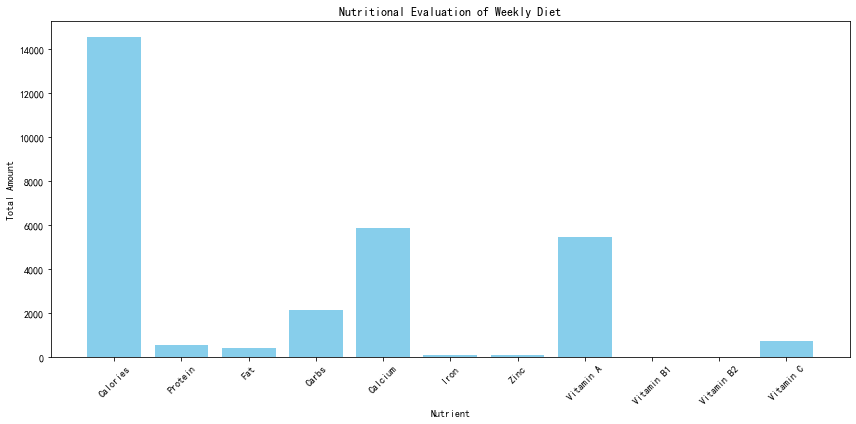

能量与目标值相差: 505.23%
Calcium 达成率: 731.34%
Iron 达成率: 702.07%
Zinc 达成率: 536.75%
Vitamin_a 达成率: 680.00%
Vitamin_b1 达成率: 840.00%
Vitamin_b2 达成率: 640.71%
Vitamin_c 达成率: 731.70%
蛋白质供能比例: 14.42%
脂肪供能比例: 23.61%
碳水化合物供能比例: 58.39%


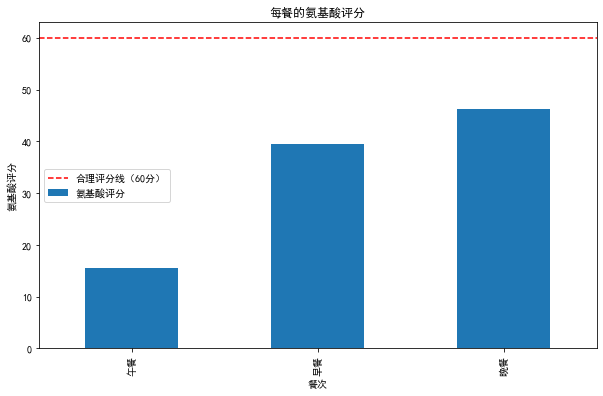

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
# 设置matplotlib绘图时可以显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 使得坐标轴负号显示正常

# 膳食营养评价函数，保留两位小数
def evaluate_nutrition_weekly(selected_foods, selected_quantities, data):
    # 计算总营养成分
    total_calories = round(sum(data.loc[data['食物名称'] == food, '实际摄入能量kcal'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_protein = round(sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_fat = round(sum(data.loc[data['食物名称'] == food, '实际摄入脂肪g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_carbs = round(sum(data.loc[data['食物名称'] == food, '实际摄入碳水化合物g'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_calcium = round(sum(data.loc[data['食物名称'] == food, '实际摄入钙（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_iron = round(sum(data.loc[data['食物名称'] == food, '实际摄入铁（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_zinc = round(sum(data.loc[data['食物名称'] == food, '实际摄入锌（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_a = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素A（μg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b1 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B1/硫胺素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_b2 = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素B2/核黄素（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    total_vitamin_c = round(sum(data.loc[data['食物名称'] == food, '实际摄入维生素C（mg）'].values[0] * qty for food, qty in zip(selected_foods, selected_quantities)), 2)
    
    # 显示总营养成分
    print(f"总能量: {total_calories} kcal")
    print(f"总蛋白质: {total_protein} g")
    print(f"总脂肪: {total_fat} g")
    print(f"总碳水化合物: {total_carbs} g")
    print(f"总钙: {total_calcium} mg")
    print(f"总铁: {total_iron} mg")
    print(f"总锌: {total_zinc} mg")
    print(f"总维生素A: {total_vitamin_a} μg")
    print(f"总维生素B1: {total_vitamin_b1} mg")
    print(f"总维生素B2: {total_vitamin_b2} mg")
    print(f"总维生素C: {total_vitamin_c} mg")

    # 可视化
    labels = ['Calories', 'Protein', 'Fat', 'Carbs', 'Calcium', 'Iron', 'Zinc', 'Vitamin A', 'Vitamin B1', 'Vitamin B2', 'Vitamin C']
    values = [total_calories, total_protein, total_fat, total_carbs, total_calcium, total_iron, total_zinc, total_vitamin_a, total_vitamin_b1, total_vitamin_b2, total_vitamin_c]

    plt.figure(figsize=(12, 6))
    plt.bar(labels, values, color='skyblue')
    plt.xlabel('Nutrient')
    plt.ylabel('Total Amount')
    plt.title('Nutritional Evaluation of Weekly Diet')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('nutritional_evaluation_weekly.png')
    plt.show()

    return {
        'total_calories': total_calories,
        'total_protein': total_protein,
        'total_fat': total_fat,
        'total_carbs': total_carbs,
        'total_calcium': total_calcium,
        'total_iron': total_iron,
        'total_zinc': total_zinc,
        'total_vitamin_a': total_vitamin_a,
        'total_vitamin_b1': total_vitamin_b1,
        'total_vitamin_b2': total_vitamin_b2,
        'total_vitamin_c': total_vitamin_c
    }

# 评价能量、餐次比及非产能主要营养素含量
def evaluate_energy_and_nutrients(nutrition_results, target_calories=2400):
    energy_diff = (nutrition_results['total_calories'] - target_calories) / target_calories * 100
    print(f"能量与目标值相差: {energy_diff:.2f}%")
    
    # 定义参考摄入量
    reference_intake = {
        'calcium': 800,  # mg
        'iron': 15,      # mg
        'zinc': 12,      # mg
        'vitamin_a': 800,  # μg
        'vitamin_b1': 1.4, # mg
        'vitamin_b2': 1.4, # mg
        'vitamin_c': 100   # mg
    }
    
    # 计算营养素达成率
    intake_ratio = {nutrient: (nutrition_results[f'total_{nutrient}'] / ref) * 100 for nutrient, ref in reference_intake.items()}
    
    # 打印营养素达成率
    for nutrient, ratio in intake_ratio.items():
        print(f"{nutrient.capitalize()} 达成率: {ratio:.2f}%")
    
    return intake_ratio

# 评价能量来源
def evaluate_energy_sources(nutrition_results):
    total_energy = nutrition_results['total_calories']
    protein_energy = 4 * nutrition_results['total_protein']
    fat_energy = 9 * nutrition_results['total_fat']
    carb_energy = 4 * nutrition_results['total_carbs']
    
    protein_pct = protein_energy / total_energy * 100
    fat_pct = fat_energy / total_energy * 100
    carb_pct = carb_energy / total_energy * 100
    
    print(f"蛋白质供能比例: {protein_pct:.2f}%")
    print(f"脂肪供能比例: {fat_pct:.2f}%")
    print(f"碳水化合物供能比例: {carb_pct:.2f}%")
    
    # 参考值
    ref_protein_pct = (10, 15)
    ref_fat_pct = (20, 30)
    ref_carb_pct = (50, 65)
    
    return {
        'protein_pct': protein_pct,
        'fat_pct': fat_pct,
        'carb_pct': carb_pct
    }

# 参考蛋白质氨基酸评分模式
reference_aa = {
    '异亮氨酸（mg）': 40,
    '亮氨酸（mg）': 70,
    '赖氨酸（mg）': 55,
    '含硫氨基酸（mg）': 35,
    '芳香族氨基酸（mg）': 60,
    '苏氨酸（mg）': 40,
    '色氨酸（mg）': 10,
    '缬氨酸（mg）': 50
}

# 评价每餐的蛋白质氨基酸评分
def evaluate_amino_acid_scores_weekly(selected_foods, selected_quantities, selected_meals, data):
    amino_acid_scores = {}
    
    meals = data['餐次'].unique()
    for meal in meals:
        meal_foods = [food for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]
        meal_quantities = [qty for food, qty, m in zip(selected_foods, selected_quantities, selected_meals) if m == meal]
        
        total_lysine = sum(data.loc[data['食物名称'] == food, '实际摄入赖氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_leucine = sum(data.loc[data['食物名称'] == food, '实际摄入亮氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_isoleucine = sum(data.loc[data['食物名称'] == food, '实际摄入异亮氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_sulfur = sum(data.loc[data['食物名称'] == food, '实际摄入含硫氨基酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_aromatic = sum(data.loc[data['食物名称'] == food, '实际摄入芳香族氨基酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_threonine = sum(data.loc[data['食物名称'] == food, '实际摄入苏氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_tryptophan = sum(data.loc[data['食物名称'] == food, '实际摄入色氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        total_valine = sum(data.loc[data['食物名称'] == food, '实际摄入缬氨酸（mg）'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        
        # 计算每餐蛋白质总量
        total_protein = sum(data.loc[data['食物名称'] == food, '实际摄入蛋白质g'].values[0] * qty for food, qty in zip(meal_foods, meal_quantities))
        
        # 将氨基酸含量从mg/100g食物转换为mg/g蛋白质
        total_lysine /= total_protein
        total_leucine /= total_protein
        total_isoleucine /= total_protein
        total_sulfur /= total_protein
        total_aromatic /= total_protein
        total_threonine /= total_protein
        total_tryptophan /= total_protein
        total_valine /= total_protein
        
        # 计算每餐氨基酸评分
        lysine_score = total_lysine / reference_aa['赖氨酸（mg）'] * 100
        leucine_score = total_leucine / reference_aa['亮氨酸（mg）'] * 100
        isoleucine_score = total_isoleucine / reference_aa['异亮氨酸（mg）'] * 100
        sulfur_score = total_sulfur / reference_aa['含硫氨基酸（mg）'] * 100
        aromatic_score = total_aromatic / reference_aa['芳香族氨基酸（mg）'] * 100
        threonine_score = total_threonine / reference_aa['苏氨酸（mg）'] * 100
        tryptophan_score = total_tryptophan / reference_aa['色氨酸（mg）'] * 100
        valine_score = total_valine / reference_aa['缬氨酸（mg）'] * 100
        
        # 计算综合氨基酸评分（取最低值）
        amino_acid_score = min(lysine_score, leucine_score, isoleucine_score, sulfur_score, aromatic_score, threonine_score, tryptophan_score, valine_score)
        
        amino_acid_scores[meal] = round(amino_acid_score, 2)
        print(f"{meal} 的蛋白质氨基酸评分: {amino_acid_scores[meal]}")
    
    return amino_acid_scores

# 调用函数进行每餐蛋白质氨基酸评分评价
amino_acid_scores_weekly = evaluate_amino_acid_scores_weekly(selected_foods, selected_quantities, selected_meals, data)

# 计算并显示每周食谱的综合评价结果
nutrition_results_weekly = evaluate_nutrition_weekly(selected_foods_total, selected_quantities_total, df_new)

# 调用函数进行能量和营养素评价
intake_ratios_weekly = evaluate_energy_and_nutrients(nutrition_results_weekly)

# 调用函数进行能量来源评价
energy_sources_weekly = evaluate_energy_sources(nutrition_results_weekly)

# 可视化每餐的氨基酸评分
def plot_amino_acid_scores(amino_acid_scores):
    aa_scores_df = pd.DataFrame(amino_acid_scores, index=["氨基酸评分"]).T

    aa_scores_df.plot(kind='bar', figsize=(10, 6))
    plt.title('每餐的氨基酸评分')
    plt.ylabel('氨基酸评分')
    plt.xlabel('餐次')
    plt.axhline(y=60, color='r', linestyle='--', label='合理评分线（60分）')
    plt.legend()
    plt.show()

# 调用函数进行氨基酸评分的可视化
plot_amino_acid_scores(amino_acid_scores_weekly)

